<a href="https://colab.research.google.com/github/gmarchiello/Spotify-All-Out-Analysis_2/blob/main/Analyzing_Music_Trends_Across_Decades_Insights_from_Spotify's_%22All_Out%22_Playlists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Music Trends Across Decades: Insights from Spotify's "All Out" Playlists

The **"All Out"** series of playlists on Spotify, such as **"All Out 80s," "All Out 90s,"** etc., are  carefully curated collections that highlight popular and iconic tracks from specific decades. These playlists feature a selection of influential songs that defined their respective eras, offering a nostalgic look back at the music of each decade.

To analyze and explore trends in music production and the music industry, we will use these playlists as a valuable dataset. This analysis will go beyond traditional music features such as Tempo, Loudness, and Keys, and will also incorporate additional insights from Spotify's API. By leveraging Spotify's features and metadata, we aim to gain a deeper understanding of how music trends have evolved over time and identify patterns that may not be immediately apparent from basic audio features alone.

For detailed information on the available audio features and how to retrieve them using the Spotify API, you can consult the [Spotify API documentation](https://developer.spotify.com/documentation/web-api/reference/get-audio-features).

# Importing Packages

This section imports the necessary libraries and modules for data manipulation, visualization, and preprocessing:

- **`numpy`** and **`pandas`**: For handling numerical and structured data.
- **`matplotlib.pyplot`** and **`seaborn`**: For creating plots and visualizations.
- **`json`** and **`collections.Counter`**: For working with JSON data and counting occurrences.
- **`sklearn.preprocessing.LabelEncoder`**: For encoding categorical labels into numeric format.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Opening JSON

In this section, we load and display the content of the `tracks.json` file, which was previously retrieved from the Spotify API. This file contains track data in JSON format. We use Python's `json` module to read the file and print its contents to examine its structure and data.


In [2]:
with open('Spotify All Out Playlist Tracks.json', 'r') as file:
  all_tracks = json.load(file)

# Mapping Tracks to Macro-Genres

In this section, we will categorize each track into one of the predefined macro-genres based on its specific genres. This classification simplifies the dataset, making it easier to analyze broader genre trends.


### Identifying Songs with Unknown Genre

In this section, we identify and display songs that have an "Unknown" genre. We iterate through the list of all tracks and check if the genre of each track is labeled as "Unknown." For each song with this genre, we print the track ID, artist name, song name, and genre. This helps us pinpoint tracks that may need further review or categorization.



In [3]:
# Print a header to indicate the start of the output for songs with unknown genre
print('Songs with Unknown Genre:\n')

# Iterate through each track in the list of all tracks
for i, track in enumerate(all_tracks):
    # Check if the genre of the current track is 'Unknown'
    if track['Genres'] == ['Unknown']:
        # Print the track ID
        print(f"ID: {track['Track_ID']}")
        # Print the artist's name
        print(f"Artist: {track['Artist_name']}")
        # Print the song's name
        print(f"Song Name: {track['Track_name']}")
        # Print the genre of the track
        print(f"Genre: {track['Genres']}")
        # Print a newline for better readability
        print("\n")


Songs with Unknown Genre:

ID: 2yOXKIU9YtBSWjI3OA8tqj
Artist: Thurston Harris
Song Name: Little Bitty Pretty One
Genre: ['Unknown']


ID: 6vcNJUWtUPB0hKC6VbZriY
Artist: Scott McKenzie
Song Name: San Francisco (Be Sure to Wear Flowers in Your Hair) - Single Version
Genre: ['Unknown']


ID: 5Ts1DYOuouQLgzTaisxWYh
Artist: Edison Lighthouse
Song Name: Love Grows (Where My Rosemary Goes)
Genre: ['Unknown']


ID: 17phhZDn6oGtzMe56NuWvj
Artist: Teddy Swims
Song Name: Lose Control
Genre: ['Unknown']


ID: 5aIVCx5tnk0ntmdiinnYvw
Artist: Tyla
Song Name: Water
Genre: ['Unknown']




### Applying Missing Genres to Songs

In this section, we apply genres to songs that were previously categorized as "Unknown." I manually researched and identified the genres for these tracks by looking them up on the web. The `missing_genres` dictionary maps specific track IDs to their respective genres based on this manual research. The code updates the genre information for each song in the `all_tracks` list according to this mapping. After updating, it prints out the track IDs along with their newly assigned genres.


In [4]:
# Dictionary mapping track IDs to their respective genres, manually researched
missing_genres = {
    "2yOXKIU9YtBSWjI3OA8tqj": "R&B",
    "6vcNJUWtUPB0hKC6VbZriY": "Pop",
    "5Ts1DYOuouQLgzTaisxWYh": "Rock",
    "1SOClUWhOi8vHZYMz3GluK": "Pop",
    "17phhZDn6oGtzMe56NuWvj": "Soul",
    "5aIVCx5tnk0ntmdiinnYvw": "R&B"
}

# Print a header to indicate the start of the output for applied genres
print("Applied genres to songs: \n")

# Iterate through the dictionary of missing genres
for k, g in missing_genres.items():
    # Iterate through each track in the list of all tracks
    for track in all_tracks:
        # Check if the current track ID matches the one in the dictionary
        if track["Track_ID"] == k:
            # Update the genre of the track with the value from the dictionary
            track["Genres"] = [g]
            # Print the track ID and the newly applied genre
            print(f"{track['Track_ID']}: {g} ")


Applied genres to songs: 

2yOXKIU9YtBSWjI3OA8tqj: R&B 
6vcNJUWtUPB0hKC6VbZriY: Pop 
5Ts1DYOuouQLgzTaisxWYh: Rock 
17phhZDn6oGtzMe56NuWvj: Soul 
5aIVCx5tnk0ntmdiinnYvw: R&B 


## Create a Macro Genre

### Extracting and Analyzing Unique Genres

In this section, we extract and analyze the genres from the dataset to identify all the unique genres present in the tracks. This step is crucial for streamlining the analysis, as we plan to use only 10 macro genres for interpretability.

The code performs the following tasks:
1. **Extracts all genres** from the `all_tracks` dataset and aggregates them into a single list.
2. **Counts the occurrences** of each genre using the `Counter` from the `collections` module.
3. **Prints the total number** of unique genres.
4. **Displays each genre** along with its count.
5. **Lists and sorts** all unique genres for a clearer view of the genre landscape.

This analysis helps us understand the diversity of genres in the dataset and prepares us for the subsequent step of consolidating genres into 10 macro categories.


In [5]:
# Extract all genres from the dataset
all_genres = []
for item in all_tracks:
    genres = item.get('Genres')
    if genres:  # Ensure that genres is not None
        all_genres.extend(genres)

# Count the occurrences of each genre
genre_counts = Counter(all_genres)

# Print the total number of unique genres
print(f"Total number of unique genres: {len(genre_counts)}")

# Print all genres and their counts
print("\nAll genres and their counts:")
for genre, count in genre_counts.items():
    print(f"{genre}: {count}")

# Create a list of all unique genres
unique_genres = list(genre_counts.keys())

Total number of unique genres: 393

All genres and their counts:
rock-and-roll: 114
rockabilly: 80
calypso: 2
acoustic blues: 2
blues: 11
harmonica blues: 1
rhythm and blues: 16
texas blues: 1
traditional blues: 6
adult standards: 96
torch song: 16
vocal jazz: 60
classic soul: 49
jazz blues: 26
piano blues: 9
soul: 99
soul blues: 14
canadian pop: 37
easy listening: 39
piano rock: 26
lounge: 28
swing: 13
harlem renaissance: 5
jazz: 12
doo-wop: 44
cool jazz: 3
jazz trumpet: 3
classic rock: 195
folk rock: 74
mellow gold: 148
singer-songwriter: 85
motown: 32
brill building pop: 14
blues rock: 16
chicago blues: 4
electric blues: 8
louisiana blues: 7
new orleans blues: 7
bubblegum pop: 16
soft rock: 163
funk: 16
quiet storm: 17
country: 13
honky tonk: 5
traditional country: 5
yodeling: 6
jump blues: 4
bluegrass gospel: 1
country boogie: 1
country gospel: 1
western swing: 1
sunshine pop: 12
chicago soul: 4
vocal harmony group: 3
R&B: 2
surf music: 2
memphis blues: 3
nashville sound: 5
arkansa

### Creating Macro-Genre Dictionaries

To streamline our analysis, we will categorize the 392 unique genres into 10 macro-genres. This grouping simplifies the analysis and interpretation by consolidating similar genres into broader categories. Below is the dictionary that maps specific genres to these macro-genres:

- **Rock**: Includes various forms of rock music, from classic rock to punk and metal.
- **Pop**: Encompasses a range of pop styles, including dance pop, synth pop, and K-pop.
- **R&B/Soul**: Combines soul and R&B genres, including contemporary R&B, neo soul, and classic soul.
- **Hip Hop/Rap**: Covers different styles of hip hop and rap, from gangsta rap to trap and alternative hip hop.
- **Electronic/Dance**: Includes electronic and dance music genres, such as EDM, house, and techno.
- **Country/Folk**: Groups together country and folk music, including traditional country, bluegrass, and Americana.
- **Jazz**: Encompasses various jazz styles, including bebop, smooth jazz, and Latin jazz.
- **Reggae/Caribbean**: Covers reggae and Caribbean genres, such as dancehall and ska.
- **World**: Includes global music genres, such as Latin pop, Afrobeats, and Celtic music.

This organization helps in analyzing trends and patterns across broader genre categories rather than individual genres.

In [6]:
# Dictionary mapping specific genres to broader macro-genres
music_genres = {
    "Rock": [
        "rock", "alternative rock", "classic rock", "hard rock", "punk", "metal",
        "grunge", "glam rock", "psychedelic rock", "progressive rock",
        "folk rock", "indie rock", "garage rock", "britpop", "southern rock",
        "art rock", "post-punk", "rockabilly", "surf music", "permanent wave",
        "pop rock", "post-grunge", "alternative metal", "rock-and-roll"
    ],
    "Pop": [
        "pop", "dance pop", "synth pop", "europop", "k-pop", "bubblegum pop",
        "power pop", "candy pop", "adult contemporary", "teen pop",
        "electropop", "art pop", "indie pop", "sophisti-pop", "neo mellow",
        "scandipop", "viral pop", "uk pop", "hollywood", "nz pop", "new wave pop"
    ],
    "R&B/Soul": [
        "soul", "contemporary r&b", "neo soul", "classic soul", "motown", "funk",
        "quiet storm", "memphis soul", "southern soul", "philly soul",
        "british soul", "northern soul", "r&b", "rhythm and blues"
    ],
    "Hip Hop/Rap": [
        "hip hop", "rap", "gangsta rap", "trap", "conscious hip hop", "east coast hip hop",
        "west coast hip hop", "southern hip hop", "alternative hip hop",
        "pop rap", "drill", "melodic rap", "old school hip hop"
    ],
    "Electronic/Dance": [
        "edm", "house", "techno", "trance", "electro", "trip hop",
        "drum and bass", "dubstep", "ambient", "idm", "electronic", "dance", "eurodance",
        "electro house", "dark clubbing", "float house", "synthpop", "aussietronica"
    ],
    "Country/Folk": [
        "contemporary country", "traditional country", "country rock",
        "outlaw country", "country pop", "bluegrass", "americana",
        "traditional folk", "contemporary folk", "singer-songwriter", "country", "folk"
    ],
    "Jazz": [
        "vocal jazz", "smooth jazz", "bebop", "cool jazz", "fusion",
        "big band", "contemporary jazz", "latin jazz", "jazz", "adult standards",
        "doo-wop", "deep adult standards"
    ],
    "Reggae/Caribbean": [
        "reggae", "dancehall", "ska", "reggaeton", "calypso", "soca", "caribbean"
    ],
    "World": [
        "latin pop", "afrobeats", "celtic", "world fusion", "ethnic",
        "native american", "world", "native american contemporary"
    ]
}

### Adding the 'Genres_Macro' Column

To facilitate broader analysis, we will introduce a new column, `Genres_Macro`, to categorize each track into one or more macro-genres. This column will be populated based on the track's specific genres using our predefined macro-genre categories.

**Process Overview:**
1. **Initialize Column**: Add a `Genres_Macro` column to each track in the dataset and initialize it as an empty string.
2. **Assign Macro-Genres**: For each track, check its genres against the `music_genres` dictionary. Assign the corresponding macro-genres to the `Genres_Macro` column.
3. **Format Macro-Genres**: Combine all assigned macro-genres into a comma-separated string.

This approach simplifies the genre classification, enabling more straightforward analysis of genre trends and patterns across broader categories.


In [7]:
# Initialize the 'Genres_Macro' column for each track
for track in all_tracks:
    track['Genres_Macro'] = ''  # Ensures the "Genres_Macro" key exists in the track dictionary

# Assign only one macro-genre to each track
for track in all_tracks:
    for genre, subgenres in music_genres.items():
        # Check if any subgenre of the macro-genre is present in the track's genres
        if any(subgenre in track["Genres"] for subgenre in subgenres):
            track["Genres_Macro"] = genre  # Assign the matching macro-genre
            break  # Stop after the first matching macro-genre is found

# Converting Track Data to DataFrame

To facilitate further analysis, we will convert our list of track dictionaries into a pandas DataFrame. This DataFrame will allow us to utilize pandas' powerful data manipulation and analysis capabilities.

In [8]:
# Convert list of dictionaries to DataFrame
df_tracks = pd.DataFrame(all_tracks)

# Display the DataFrame
print(df_tracks.head())

  Decade                Track_ID        Artist_name           Track_name  \
0  1950s  4gphxUgq0JSFv2BCLhNDiE      Elvis Presley       Jailhouse Rock   
1  1950s  4fHDlIntTsRGSyTg5UYZYC    Harry Belafonte  Banana Boat (Day-O)   
2  1950s  5Oc0vLGWdEWeCqIU8zyELt  Big Mama Thornton            Hound Dog   
3  1950s  7caj6X6NMX3tlhWnu1du6V     Ritchie Valens   We Belong Together   
4  1950s  2CeqxyOZEyiL6pTDYZ9gPH          Peggy Lee                Fever   

   Popularity  Explicit Release_year  \
0          66     False         1958   
1          64     False         1956   
2          55     False         1989   
3          72     False         1959   
4          55     False         1988   

                                              Genres  danceability  energy  \
0                        [rock-and-roll, rockabilly]         0.647  0.5820   
1                                          [calypso]         0.797  0.1050   
2  [acoustic blues, blues, harmonica blues, rhyth...         0.563  

In [9]:
#Check the columns
df_tracks.columns

Index(['Decade', 'Track_ID', 'Artist_name', 'Track_name', 'Popularity',
       'Explicit', 'Release_year', 'Genres', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'Genres_Macro'],
      dtype='object')

### Verifying the Macro-Genres Substitution

To ensure the substitution of specific genres into macro-genres was executed correctly, we will perform the following checks:

1. **Count Unique Macro-Genres**: Determine the number of unique macro-genres present in the `Genres_Macro` column.
2. **List Macro-Genres**: Display the unique macro-genres to identify if there are any unexpected values, such as an entry labeled "Macro_Genre".




In [10]:
#Check the Macro Genres in the Dataframe
print(f"Macro Genres' number:\n {len(df_tracks['Genres_Macro'].unique())}")
print(f"Macro Genres:\n {df_tracks['Genres_Macro'].unique()}")

Macro Genres' number:
 10
Macro Genres:
 ['Rock' 'Reggae/Caribbean' 'R&B/Soul' 'Jazz' 'Country/Folk' '' 'Pop'
 'World' 'Electronic/Dance' 'Hip Hop/Rap']


There are 10 unique macro-genres in the dataset instead of the expected 9, including an entry labeled as an empty string ''.

In [11]:
# Count the number of tracks where the 'Genres_Macro' column has empty strings
empty_genre_count = df_tracks[df_tracks['Genres_Macro'] == '']['Track_ID'].count()

# Display the count of macro-genre entries with empty strings
print(f"Number of tracks with empty 'Genres_Macro': {empty_genre_count}")

Number of tracks with empty 'Genres_Macro': 107


In [12]:
print(f"Numer of null rows {df_tracks['Genres_Macro'].isna().sum()}")

Numer of null rows 0


### Finalizing Macro-Genres Assignment with Regular Expressions
There are 104 tracks with assigned macro-genres and no null values in the Genres_Macro column.
To ensure that each macro-genre is correctly categorized, we will use regular expressions (RegEx) to search for predefined macro-genre keywords within the Genres column. If a match is found, the appropriate macro-genre will be applied.

In this cell, we create a dictionary called `genre_mapping` to map specific music genres to their corresponding macro-genres. This mapping will be used to standardize the genre information in our dataset by associating each specific genre with a broader macro-genre category.

**Dictionary Details:**
- Each **key** represents a specific genre.
- Each **value** represents the corresponding macro-genre.

This mapping will facilitate the conversion of detailed genre information into broader categories, making the data more interpretable and consistent for further analysis.


In [13]:
#Create a dictionary of the Macro Genres.
genre_mapping = {
    'rock': 'Rock', 'pop': 'Pop', 'r&b': 'R&B/Soul', 'soul': 'R&B/Soul',
    'hip hop': 'Hip Hop/Rap', 'rap': 'Hip Hop/Rap', 'electronic': 'Electronic/Dance',
    'dance': 'Electronic/Dance', 'country': 'Country/Folk', 'folk': 'Country/Folk',
    'jazz': 'Jazz', 'blues': 'Blues', 'reggae': 'Reggae/Caribbean', 'world': 'World'
}

In this cell, we map specific subgenres to their corresponding macro-genres using regular expressions (RegEx). The process involves:

1. **Creating Regex Patterns**: For each subgenre, a regex pattern is generated to match it within the genre strings, ensuring precise identification.
2. **Applying Regex to DataFrame**: A boolean mask is created to identify rows where the `Genres` column contains the subgenre. This involves checking each genre list for a match against the regex pattern.
3. **Updating Macro-Genres**: The `Genres_Macro` column is updated with the appropriate macro-genre based on the mask. Rows where the subgenre is found will have their macro-genre assigned accordingly.

This approach ensures that each specific subgenre is correctly categorized into its broader macro-genre category, enhancing data consistency and interpretability.

In [14]:
# Iterate over each subgenre and its corresponding macro-genre from the genre_mapping dictionary

for subgenre, macro_genre in genre_mapping.items():
    # Create a regex pattern to match the subgenre within genre strings
    # \b denotes word boundaries to ensure whole words are matched
    pattern = rf'\b{subgenre}\b'

    # Create a boolean mask where 'Genres' column contains the subgenre
    # Apply a lambda function to check if any genre in the list contains the subgenre pattern
    mask = df_tracks['Genres'].apply(lambda genres: any(pd.Series(genres).str.contains(pattern, case=False, regex=True)))

    # Update the 'Genres_Macro' column to the corresponding macro-genre where the mask is True
    df_tracks.loc[mask, 'Genres_Macro'] = macro_genre

# Check the number of rows where the 'Genres_Macro' column is still an empty string
# This helps identify if there are any songs that have not been assigned a macro-genre
remaining_empty_macro_genres = df_tracks[df_tracks['Genres_Macro'] == '']['Genres_Macro'].count()

# Display the count of remaining empty 'Genres_Macro'
print(f"Number of songs with unassigned Macro Genres: {remaining_empty_macro_genres}")


Number of songs with unassigned Macro Genres: 13


Out of the initial 104 songs with an empty 'Genres_Macro' field, only 13 songs remain without an assigned macro-genre.

**Next Steps:**
- These 13 songs will be removed from the dataset to ensure that all entries have a valid macro-genre assignment.
- Removing these songs helps maintain data consistency and completeness for further analysis.

The following code will perform the deletion of these entries from the DataFrame.


In [15]:
# Create a boolean mask to identify rows where the 'Genres_Macro' column is an empty string
mask_empty_genres_macro = df_tracks['Genres_Macro'] == ''

# Filter the DataFrame to exclude rows where the 'Genres_Macro' is an empty string
# The ~ operator is used to negate the mask, keeping only rows where 'Genres_Macro' is not empty
df_tracks = df_tracks[~mask_empty_genres_macro]

# Display the shape of the updated DataFrame to verify the number of rows after filtering
print(f"Number of rows in the DataFrame after removing songs with empty 'Genres_Macro': {df_tracks.shape[0]}")


Number of rows in the DataFrame after removing songs with empty 'Genres_Macro': 1187


In [16]:
# Display the names of all columns in the DataFrame
# This helps verify the current structure of the DataFrame and ensure that the expected columns are present
print("Columns in the DataFrame:")
print(df_tracks.columns)

Columns in the DataFrame:
Index(['Decade', 'Track_ID', 'Artist_name', 'Track_name', 'Popularity',
       'Explicit', 'Release_year', 'Genres', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'Genres_Macro'],
      dtype='object')


# Checking for Duplicate Songs Based on 'Track_ID'

In this section, we will identify duplicate songs in the DataFrame by examining the `Track_ID` column, which serves as the primary key.

**Purpose:**
- Ensure each track is unique by checking for duplicate `Track_ID` values.
- Duplicate entries can lead to redundancy and skew analysis results.

The following code will help in detecting and handling duplicate `Track_ID` entries.


In [17]:
# Check the total number of rows in the DataFrame
# This provides an overview of the dataset size before addressing duplicates
print(f"DataFrame's number of rows: {df_tracks.shape[0]}")

# Check the total number of duplicate 'Track_ID' entries
# This indicates how many duplicate records exist based on the 'Track_ID' column
print(f"Number of duplicates: {df_tracks['Track_ID'].duplicated().sum()}")

# Create a boolean mask for identifying duplicated 'Track_ID' values
# The mask is True for duplicated rows and False for unique rows
duplicates = df_tracks['Track_ID'].duplicated()

# Filter the DataFrame to show only rows with duplicated 'Track_ID'
# Display relevant columns for easier inspection of duplicated tracks
df_duplicates = df_tracks[['Artist_name', 'Track_name']][duplicates]

# Print the duplicated tracks for review
print('\nDuplicated tracks:')
print(df_duplicates)


DataFrame's number of rows: 1187
Number of duplicates: 10

Duplicated tracks:
               Artist_name                      Track_name
429      Simon & Garfunkel                       The Boxer
487        Michael Jackson  Rock with You - Single Version
520        Michael Jackson  Don't Stop 'Til You Get Enough
531              The Clash     London Calling - Remastered
699           Depeche Mode               Enjoy the Silence
781  Red Hot Chili Peppers                 Californication
834        Destiny's Child                     Say My Name
901                  Kesha                         TiK ToK
925      Foster The People                 Pumped Up Kicks
964              Lady Gaga                     Bad Romance


In [18]:
# Remove duplicate rows based on the 'Track_ID' column
# The 'subset' parameter specifies that duplicates should be identified using 'Track_ID'
# The 'inplace' parameter ensures that the DataFrame is modified in place without creating a new object
df_tracks.drop_duplicates(subset='Track_ID', inplace=True)

# Print the number of rows in the DataFrame after removing duplicates
# This provides a comparison to the initial row count to confirm the removal of duplicates
print(f"DataFrame's number of rows after deleting duplicates: {df_tracks.shape[0]}")


DataFrame's number of rows after deleting duplicates: 1177


<ipython-input-18-f119a07d539a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tracks.drop_duplicates(subset='Track_ID', inplace=True)


# Checking for Missing Values

In this section, we will check for missing values within the DataFrame. Identifying missing values is essential for ensuring data integrity and completeness, as they can impact the accuracy of analysis and results.

The purpose of this check is to:
- **Ensure Data Quality**: Detect any gaps or incomplete entries in the dataset.
- **Prepare for Data Cleaning**: Identify columns or rows with missing data that may need to be addressed before further analysis.


In [19]:
print(f"Number of missing values: {df_tracks.isnull().sum()['Track_ID']}")

Number of missing values: 0



There are no missing values in the dataset. This confirms that the dataset is complete and ready for further analysis without the need for data imputation or cleaning related to missing entries.


# Data Type Conversion

In this section, we will convert variable types to ensure the DataFrame is properly formatted for analysis:

- **Time Signature**: Convert this variable to a categorical type as it represents distinct categories (e.g., 4/4, 3/4) and does not have a meaningful numerical relationship.

- **Key**: In the Spotify API, musical keys are represented as integers (e.g., 0 for C, 1 for C#/Db). We will keep this variable as an integer type to preserve its numerical representation. If needed, mapping these integers to their corresponding musical notes can be done during analysis or visualization.

- **Mode**: This variable indicates the mode (major or minor) and will be converted to a boolean type. Major can be encoded as `True` and minor as `False` to simplify analysis and modeling.

The following code will perform these type conversions.



In [20]:
# Display a summary of the DataFrame's structure, including data types of each column
# This provides information on the number of non-null values and data types for all columns
# It helps in verifying that columns are correctly formatted and identifying any issues with data types
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1177 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Decade            1177 non-null   object 
 1   Track_ID          1177 non-null   object 
 2   Artist_name       1177 non-null   object 
 3   Track_name        1177 non-null   object 
 4   Popularity        1177 non-null   int64  
 5   Explicit          1177 non-null   bool   
 6   Release_year      1177 non-null   object 
 7   Genres            1177 non-null   object 
 8   danceability      1177 non-null   float64
 9   energy            1177 non-null   float64
 10  key               1177 non-null   int64  
 11  loudness          1177 non-null   float64
 12  mode              1177 non-null   int64  
 13  speechiness       1177 non-null   float64
 14  acousticness      1177 non-null   float64
 15  instrumentalness  1177 non-null   float64
 16  liveness          1177 non-null   float64
 17  

Since 'time_signature' and 'key' are categorial variables with more than 2 variables, they will be converted in a string, while 'mode' will be converted in a boolean.

In [21]:
# Convert columns to appropriate data types for analysis

# Convert 'time_signature' to string type
# This is necessary as 'time_signature' is a categorical variable with multiple distinct values
df_tracks['time_signature'] = df_tracks['time_signature'].astype(str)

# Convert 'key' to string type
# Although 'key' is represented as integers in the API, converting to string will facilitate categorical analysis
df_tracks['key'] = df_tracks['key'].astype(str)

# Convert 'mode' to boolean type
# 'mode' indicates musical mode (major or minor) and will be encoded as boolean values for simplicity
df_tracks['mode'] = df_tracks['mode'].astype(bool)


<ipython-input-21-1f71ab2fad4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tracks['time_signature'] = df_tracks['time_signature'].astype(str)
<ipython-input-21-1f71ab2fad4c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tracks['key'] = df_tracks['key'].astype(str)
<ipython-input-21-1f71ab2fad4c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

# Identify Outliers

In this section, we will perform an initial check for outliers using the `describe()` function and visualize them with boxplots.

**Purpose:**
- **Initial Detection**: `describe()` provides summary statistics to quickly identify potential outliers based on extreme values and statistical deviations.
- **Visual Confirmation**: Boxplots will be used for a more detailed and visual identification of outliers, allowing us to assess the spread and distribution of key features more clearly.









In [22]:
df_tracks.describe().T

,count,mean,std,min,25%,50%,75%,max
Popularity,1177.0,71.997451,12.591805,0.000000,68.0000,75.000000,80.000000,100.000
danceability,1177.0,0.612323,0.153668,0.149000,0.5130,0.620000,0.729000,0.967
energy,1177.0,0.624000,0.209934,0.007560,0.4820,0.651000,0.791000,0.997
loudness,1177.0,-8.132121,3.714335,-26.440000,-10.3040,-7.433000,-5.371000,1.085
speechiness,1177.0,0.066128,0.065237,0.023100,0.0330,0.041700,0.067600,0.514
acousticness,1177.0,0.289399,0.290161,0.000018,0.0400,0.179000,0.513000,0.989
instrumentalness,1177.0,0.023435,0.107254,0.000000,0.0000,0.000009,0.000573,0.954
liveness,1177.0,0.172649,0.137387,0.020700,0.0885,0.122000,0.215000,0.911
valence,1177.0,0.598230,0.244045,0.034800,0.4100,0.621000,0.803000,0.989
tempo,1177.0,120.141884,26.599164,62.657000,100.9720,118.515000,133.738000,207.356


## Outliers Analysis Using Boxplots
We will now perform an analysis using boxplots to examine the distribution of various numerical features in our dataset. Boxplots provide insights into the central tendency, spread, and potential outliers for each feature, allowing us to:
* Visualize the range and variability of data.
* Identify any extreme values or outliers.
* Understand the distribution patterns across different features.



This analysis will help us better understand the characteristics of our data and inform any necessary preprocessing steps.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

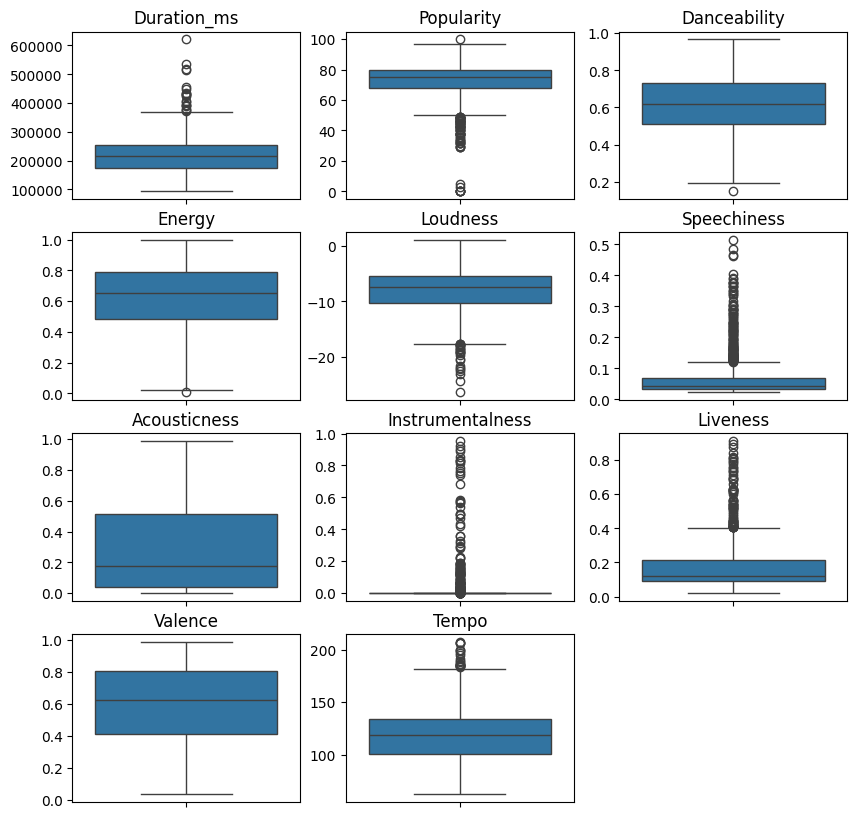

In [23]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
#fig.tight_layout(pad=3.0)  # Adjust space between plots for clarity

# Plot a boxplot for each feature
sns.boxplot(data=df_tracks['duration_ms'], ax=axes[0,0])
axes[0,0].set_title("Duration_ms")
axes[0,0].set_ylabel("")

sns.boxplot(data=df_tracks['Popularity'], ax=axes[0,1])
axes[0,1].set_title('Popularity')
axes[0,1].set_ylabel('')

sns.boxplot(data=df_tracks['danceability'], ax=axes[0,2])
axes[0,2].set_title('Danceability')
axes[0,2].set_ylabel('')

sns.boxplot(data=df_tracks['energy'], ax=axes[1,0])
axes[1,0].set_title('Energy')
axes[1,0].set_ylabel('')

sns.boxplot(data=df_tracks['loudness'], ax=axes[1,1])
axes[1,1].set_title('Loudness')
axes[1,1].set_ylabel('')

sns.boxplot(data=df_tracks['speechiness'], ax=axes[1,2])
axes[1,2].set_title("Speechiness")
axes[1,2].set_ylabel("")

sns.boxplot(data=df_tracks['acousticness'], ax=axes[2,0])
axes[2,0].set_title("Acousticness")
axes[2,0].set_ylabel("")

sns.boxplot(data=df_tracks['instrumentalness'], ax=axes[2,1])
axes[2,1].set_title("Instrumentalness")
axes[2,1].set_ylabel("")

sns.boxplot(data=df_tracks['liveness'], ax=axes[2,2])
axes[2,2].set_title("Liveness")
axes[2,2].set_ylabel("")

sns.boxplot(data=df_tracks['valence'], ax=axes[3,0])
axes[3,0].set_title("Valence")
axes[3,0].set_ylabel("")

sns.boxplot(data=df_tracks['tempo'], ax=axes[3,1])
axes[3,1].set_title("Tempo")
axes[3,1].set_ylabel("")

# Remove the empty subplot (if any) from the grid
fig.delaxes(axes[3,2])

# Show the plot
plt.show()



The boxplots confirm the presence of outliers across several features. These visualizations reveal extreme values that deviate significantly from the central distribution, highlighting areas where the data has unusual variability. This confirmation aligns with our initial observations from the descriptive statistics and emphasizes the need for further investigation or preprocessing to address these outliers.

In [24]:
# Print the size of the original dataset
print(f"Original dataset size: {df_tracks.shape[0]}")

# Define a dictionary of scaling factors 'k' for each feature to adjust outlier detection thresholds
k_values = {
    "duration_ms": 1.4,
    "danceability": 1.3,
    "energy": 1.4,
    "loudness": 1.3,
    "tempo": 0.9
}

# Initialize a dictionary to store the outliers for each feature
all_outliers = {}

# Iterate over each feature and its corresponding scaling factor
for feature, k in k_values.items():
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = df_tracks[feature].quantile(0.25)
    Q3 = df_tracks[feature].quantile(0.75)
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outlier detection using the scaling factor 'k'
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Identify outliers outside the calculated bounds
    outliers = df_tracks[(df_tracks[feature] < lower_bound) | (df_tracks[feature] > upper_bound)]
    # Remove outliers from the dataset
    df_tracks = df_tracks[(df_tracks[feature] >= lower_bound) & (df_tracks[feature] <= upper_bound)]

    # Store the identified outliers in the dictionary
    all_outliers[feature] = outliers

    # Print the number of outliers removed for each feature
    print(f"{feature} with a K value of {k} removed {outliers.shape[0]} outliers.")

# Print the size of the dataset after outlier removal
print(f"Cleaned dataset size: {df_tracks.shape[0]}")


Original dataset size: 1177
duration_ms with a K value of 1.4 removed 24 outliers.
danceability with a K value of 1.3 removed 8 outliers.
energy with a K value of 1.4 removed 6 outliers.
loudness with a K value of 1.3 removed 33 outliers.
tempo with a K value of 0.9 removed 108 outliers.
Cleaned dataset size: 998


##Verify the Absence of Outliers:
After removing outliers from the dataset, we will use boxplots to ensure that no significant outliers remain in the remaining features. This step is crucial to confirm that our data is clean and ready for further analysis.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

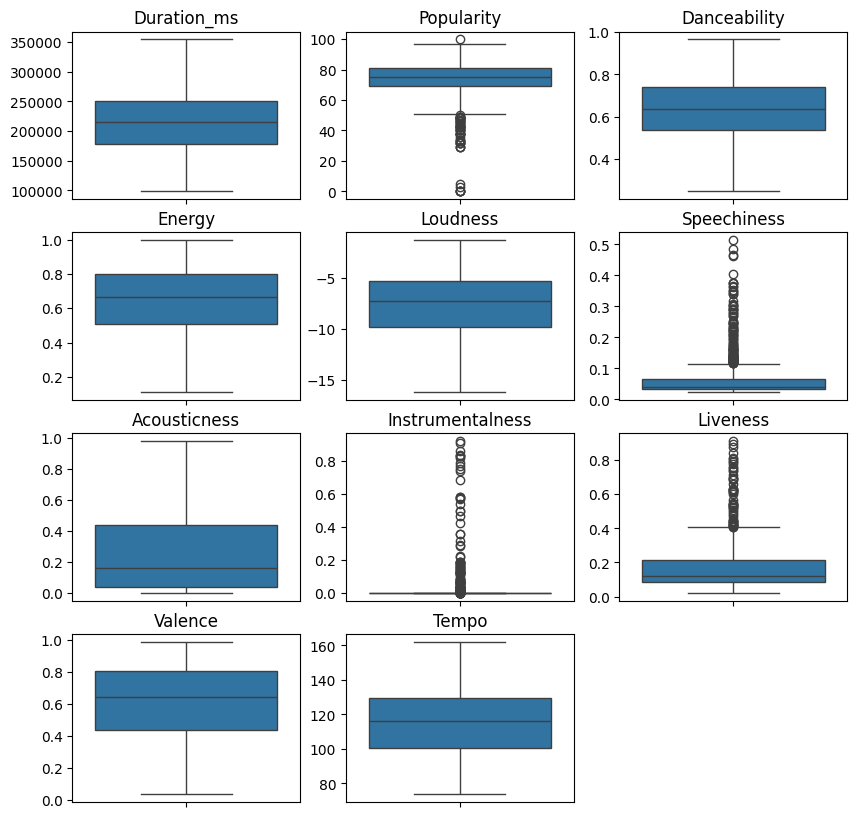

In [25]:
#Visualize Boxplot to verify the absence of outliers
# Create a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
#fig.tight_layout(pad=3.0)  # Adjust space between plots for clarity

# Plot a boxplot for each feature
sns.boxplot(data=df_tracks['duration_ms'], ax=axes[0,0])
axes[0,0].set_title("Duration_ms")
axes[0,0].set_ylabel("")

sns.boxplot(data=df_tracks['Popularity'], ax=axes[0,1])
axes[0,1].set_title('Popularity')
axes[0,1].set_ylabel('')

sns.boxplot(data=df_tracks['danceability'], ax=axes[0,2])
axes[0,2].set_title('Danceability')
axes[0,2].set_ylabel('')

sns.boxplot(data=df_tracks['energy'], ax=axes[1,0])
axes[1,0].set_title('Energy')
axes[1,0].set_ylabel('')

sns.boxplot(data=df_tracks['loudness'], ax=axes[1,1])
axes[1,1].set_title('Loudness')
axes[1,1].set_ylabel('')

sns.boxplot(data=df_tracks['speechiness'], ax=axes[1,2])
axes[1,2].set_title("Speechiness")
axes[1,2].set_ylabel("")

sns.boxplot(data=df_tracks['acousticness'], ax=axes[2,0])
axes[2,0].set_title("Acousticness")
axes[2,0].set_ylabel("")

sns.boxplot(data=df_tracks['instrumentalness'], ax=axes[2,1])
axes[2,1].set_title("Instrumentalness")
axes[2,1].set_ylabel("")

sns.boxplot(data=df_tracks['liveness'], ax=axes[2,2])
axes[2,2].set_title("Liveness")
axes[2,2].set_ylabel("")

sns.boxplot(data=df_tracks['valence'], ax=axes[3,0])
axes[3,0].set_title("Valence")
axes[3,0].set_ylabel("")

sns.boxplot(data=df_tracks['tempo'], ax=axes[3,1])
axes[3,1].set_title("Tempo")
axes[3,1].set_ylabel("")

# Remove the empty subplot (if any) from the grid
fig.delaxes(axes[3,2])

# Show the plot
plt.show()


The features **Popularity**, **Instrumentalness**, **Speechiness** and **Liveness** will be removed from the DataFrame due to the high number of outliers associated with them. Attempting to remove these outliers would significantly reduce the size of the DataFrame, which could compromise the representativeness and overall balance of the dataset. Therefore, these features will be deleted to maintain a more manageable and representative dataset.
The feature


In [26]:
# Drop features with excessive outliers
# The features 'Popularity' 'Instrumentalness', 'Speechiness', and 'Liveness' are removed from the dataset
# due to the high number of outliers, which would otherwise overly restrict the DataFrame.

df_tracks.drop(['Popularity','speechiness', 'instrumentalness', 'liveness'], axis='columns', inplace=True)


# Data Exploration and Insights

## Genre Insights

### Genre Distribution Analysis by Decade

This analysis explores the evolution of music genres over time.

This visualization helps in identifying trends and shifts in genre popularity across decades.


<Figure size 1200x600 with 0 Axes>

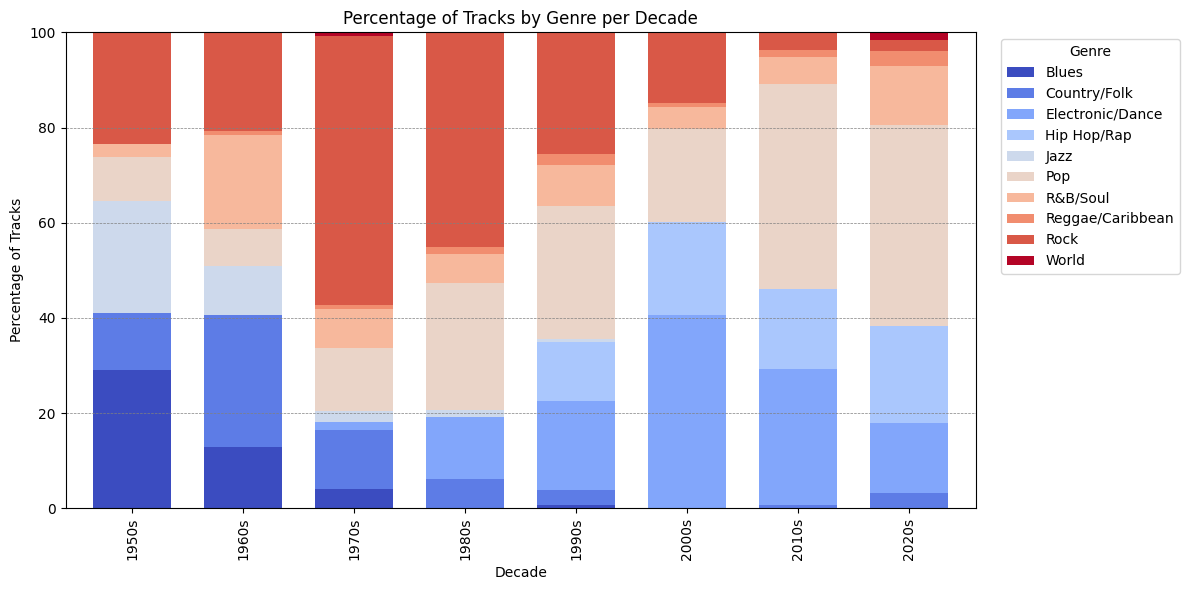

In [27]:
# Calculate the count of tracks for each genre within each decade
# Group by 'Decade' and 'Genres_Macro', then count the number of 'Track_ID's by genre
genres_per_decade_counts = df_tracks.groupby(['Decade', 'Genres_Macro'])['Track_ID'].count().unstack()

# Calculate the total number of tracks for each decade
total_tracks_per_decade = df_tracks.groupby('Decade')['Track_ID'].count()

# Compute the percentage of tracks for each genre within each decade
# Divide the genre counts by the total number of tracks per decade and multiply by 100
genres_per_decade_percentages = genres_per_decade_counts.div(total_tracks_per_decade, axis=0) * 100

# Plot a stacked bar plot to visualize the genre distribution over decades
plt.figure(figsize=(12, 6))  # Set the figure size for better readability

# Create a color map for the genres, using a gradient from the 'coolwarm' colormap
colors = plt.cm.coolwarm(np.linspace(0, 1, genres_per_decade_percentages.shape[1]))

# Generate the stacked bar plot with percentages
genres_per_decade_percentages.plot(kind='bar', stacked=True, color=colors, figsize=(12, 6), width=0.7)

# Add labels and title to the plot
plt.xlabel('Decade')  # X-axis label
plt.ylabel('Percentage of Tracks')  # Y-axis label
plt.title('Percentage of Tracks by Genre per Decade')  # Plot title

# Set the Y-axis limit to 0-100% for percentage clarity
plt.ylim(0, 100)

# Add a legend for genre categories and adjust its position
plt.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left')

# Add a grid for the Y-axis for better readability of values
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Adjust layout to prevent clipping of plot elements
plt.tight_layout()

# Display the plot
plt.show()


**Observations**

- **Blues**  
  - In the **1950s**, blues was a prominent genre but saw a sharp decline in the following decades. By the **1980s**, it had nearly disappeared, with only a small resurgence in the **1990s**.

- **Country and Folk**  
  - These genres peaked in the **1960s** but have gradually declined over time. Despite this, country and folk still hold a presence in the popular charts through the **2020s**.

- **Jazz**  
  - Jazz was a dominant genre in the **1950s**, but its presence dwindled over the years, largely disappearing from the charts by the **1990s**.

- **Pop**  
  - Pop music has consistently risen in popularity since the **1950s**, though it experienced a slight dip in the **2000s**, coinciding with the peak of hip hop.

- **Hip Hop**  
  - Hip hop started gaining traction in the **1980s** and continues to be one of the major genres in today's music.

- **R&B**  
  - R&B has fluctuated over the years but remains relatively stable, reaching a peak in the **1960s**.

- **Reggae**  
  - Reggae has never been a dominant genre but has maintained a steady presence over the decades.

- **Rock**  
  - Rock music was a leading genre in the **1950s**, reaching its height in the **1970s**. Since then, it has seen a decline and now represents a smaller portion of popular music.

- **World Music**  
  - World music has had a minimal presence in the popular charts but remains a niche and stable genre.



## Loudness Insights


The **loudness** is the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

### Loudness Trends Through the Decades
The plot below shows the average loudness of tracks across different decades.

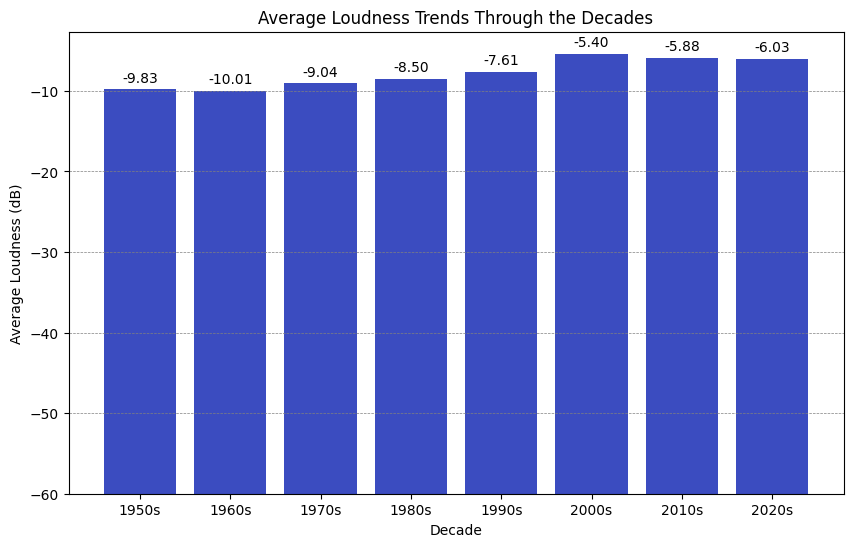

In [28]:
# Calculate the average loudness for each decade
avg_loudness_per_decade = df_tracks.groupby('Decade')['loudness'].mean()

# Create a bar plot to visualize the average loudness per decade
plt.figure(figsize=(10, 6))  # Set the size of the plot

# Generate a color
colors = plt.cm.coolwarm(0)

# Plot bars with a baseline of -60 for better visualization
bars = plt.bar(avg_loudness_per_decade.index, avg_loudness_per_decade.values - (-60),
               bottom=-60, color=colors)

# Add labels with the average loudness values above each bar
for bar in bars:
    height = bar.get_height() + (-60)  # Adjust height to reflect the baseline shift
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Decade')  # Label for the x-axis
plt.ylabel('Average Loudness (dB)')  # Label for the y-axis
plt.title('Average Loudness Trends Through the Decades')  # Title of the plot

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Display the plot
plt.show()


**Observations:**
- **1950s-1960s:** Average loudness in the 1950s and 1960s is relatively consistent, with values around -9.7 dB to -9.8 dB.
- **1970s:** There is a noticeable increase in loudness, with an average of -8.87 dB, indicating a trend towards louder music.
- **1980s-1990s:** The average loudness continues to rise, reaching -8.39 dB in the 1980s and -7.52 dB in the 1990s, reflecting a trend towards even louder music.
- **2000s:** A significant increase is observed, with the average loudness reaching -5.42 dB, suggesting a peak in loudness during this decade.
- **2010s-2020s:** The average loudness slightly decreases to -5.84 dB in the 2010s and -6.03 dB in the 2020s, but remains higher than earlier decades.

This data illustrates the trend of increasing loudness in popular music over the decades, peaking in the 2000s and showing a slight decline in recent years. This trend aligns with the broader phenomenon of the "**loudness war**," where music production has increasingly prioritized higher loudness levels.

### Loudness by Genre
The plot below shows the average loudness of tracks among different Genres.

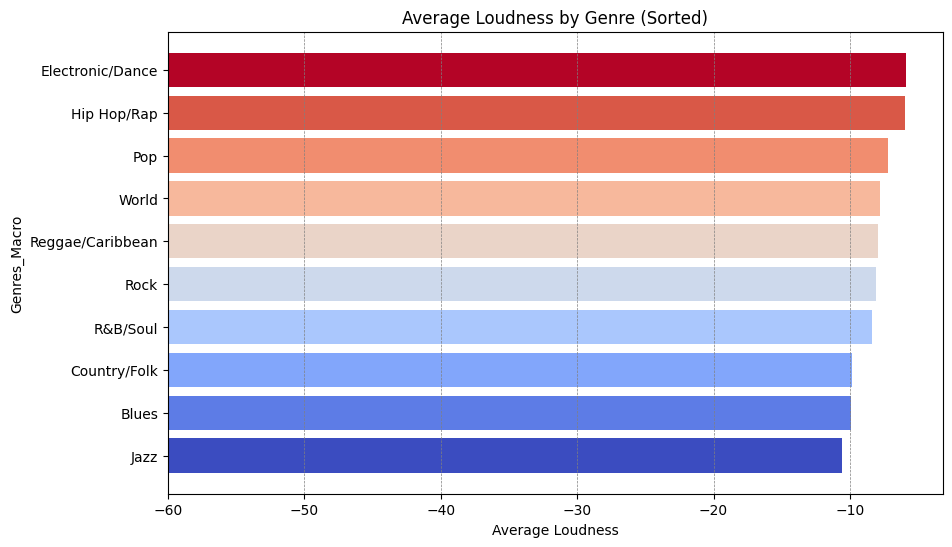

In [29]:
# Calculate the Average Loudness by Genre:
avg_loudness_per_macrogenre = df_tracks.groupby('Genres_Macro')['loudness'].mean().sort_values()

# Create a horizontal bar plot to visualize average loudness per macro genre
plt.figure(figsize=(10, 6))  # Set the figure size
colors = plt.cm.coolwarm(np.linspace(0, 1, len(avg_loudness_per_macrogenre)))  # Define a color gradient

plt.barh(avg_loudness_per_macrogenre.index,
         avg_loudness_per_macrogenre.values - (-60),  # Offset values by -60 for better visualization
         left=-60,  # Set baseline for bars
         color=colors)  # Apply colors to the bars

plt.xlabel('Average Loudness')  # Label for the x-axis
plt.ylabel('Genres_Macro')  # Label for the y-axis
plt.title('Average Loudness by Genre (Sorted)')  # Title of the plot
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='gray')  # Add grid lines for readability

plt.show()  # Display the plot

**Observations:**
- **Jazz** has the lowest average loudness at -10.58 dB, indicating that it is the least loud among the listed genres.
- **Country/Folk** and **Blues** also have relatively low average loudness, around -9.47 dB and -9.37 dB, respectively.
- **R&B/Soul** shows a moderate increase in loudness with an average of -8.36 dB.
- **Rock** and **World** genres have average loudness values of -7.84 dB and -7.76 dB, respectively, reflecting a trend towards higher loudness.
- **Reggae/Caribbean**, **Pop**, and **Electronic/Dance** genres have higher average loudness levels, with values ranging from -7.29 dB to -5.90 dB.
- **Hip Hop/Rap** and **Electronic/Dance** share the highest average loudness at -5.90 dB, indicating that these genres are the loudest among the listed genres.

This data highlights that genres like Jazz and Country/Folk tend to be quieter, while genres like Electronic/Dance and Hip Hop/Rap are much louder, reflecting trends in music production and genre characteristics.

## Tempo Insights

**Tempo** is the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

### Tempo Distribution Trends Through the Decades

This boxplot visualizes the distribution of song tempos for each decade, complemented by a line plot showing the average tempo values.

This visualization helps in understanding the changes in tempo over the decades and reveals trends or shifts in musical tempo through the years.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

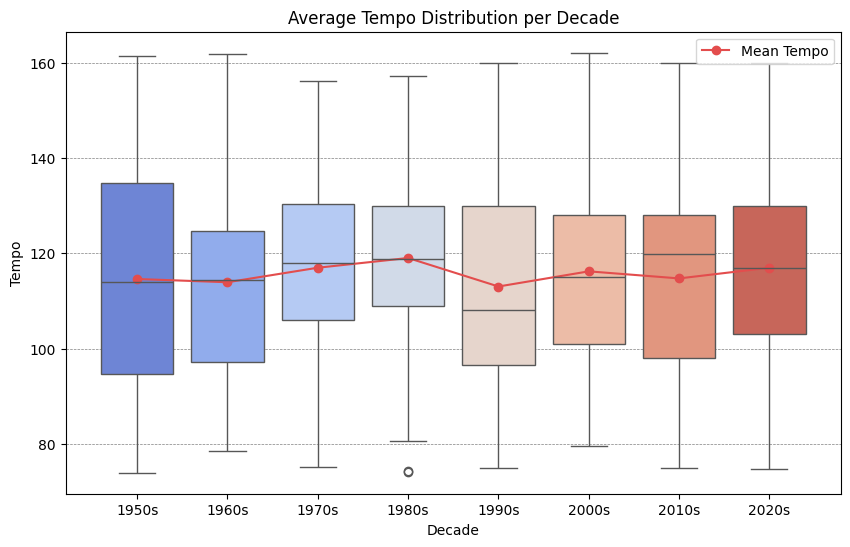

In [30]:
# Calculate the average and median tempo for each decade
avg_tempo_per_decade = df_tracks.groupby('Decade')['tempo'].mean()  # Average tempo per decade
median_tempo_per_decade = df_tracks.groupby('Decade')['tempo'].median()  # Median tempo per decade

# Create a boxplot to visualize the distribution of tempo across decades
plt.figure(figsize=(10, 6))  # Set the figure size for better clarity
sns.boxplot(x='Decade', y='tempo', data=df_tracks, hue='Decade', palette='coolwarm')  # Plot boxplot with colors for each decade
plt.xlabel('Decade')  # Label for the x-axis
plt.ylabel('Tempo')  # Label for the y-axis
plt.title('Average Tempo Distribution per Decade')  # Title of the plot

# Overlay the average tempo values as a line plot for comparison
plt.plot(avg_tempo_per_decade.index, avg_tempo_per_decade.values, color='#e34d4d', marker='o', label='Mean Tempo')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Add legend to the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))

# Display the plot
plt.show()


**Observations:**
- Since the 1990s, the range of tempos for popular songs has significantly expanded.
- From the 1950s to the 1980s, in contrast, this range was much narrower.

Therefore, the observed decline in average tempo since the 1980s is not attributable to a general decrease in BPM but rather to a broadening of the tempo range.

###Tempo by Genre

This bar plot visualizes the average tempo for each macro genre, sorted in descending order. It highlights how the tempo varies across different genres.

By examining this plot, we can gain a deeper understanding of the tempo distribution across macro genres and identify trends or patterns in musical tempo.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

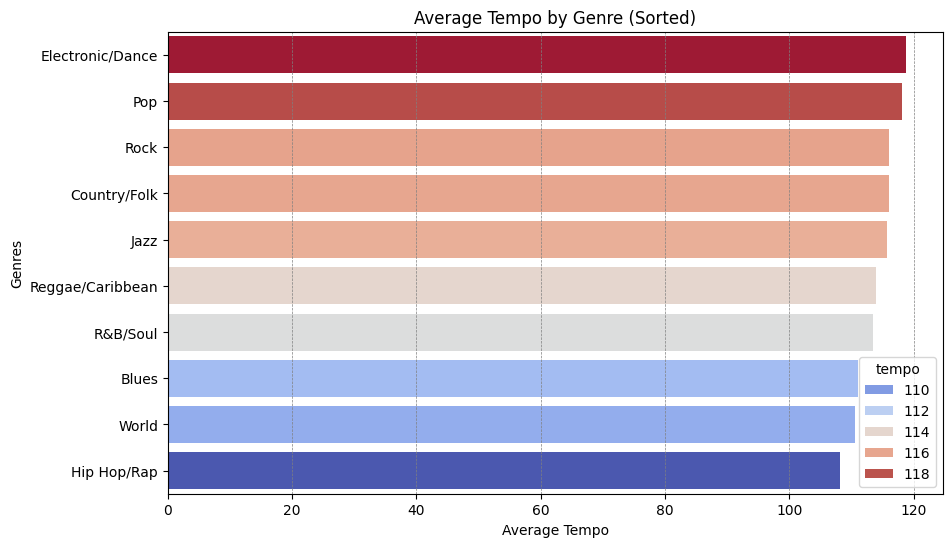

In [31]:
# Calculate the average tempo for each macro genre and sort the values in descending order
avg_tempo_per_macrogenre = df_tracks.groupby('Genres_Macro')['tempo'].mean().sort_values(ascending=False)

# Create a horizontal bar plot to visualize the average tempo per macro genre
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.barplot(y=avg_tempo_per_macrogenre.index, x=avg_tempo_per_macrogenre,
            hue=avg_tempo_per_macrogenre, palette='coolwarm')  # Create a bar plot with 'coolwarm' palette
plt.xlabel('Average Tempo')  # Label for the x-axis
plt.ylabel('Genres')  # Label for the y-axis
plt.title('Average Tempo by Genre (Sorted)')  # Title of the plot
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='gray')  # Add grid lines for better readability
plt.show()  # Display the plot



**Observations:**

- **Tempo Trends by Genre**:
  - **Electronic/Dance** and **Pop** genres tend to have higher average tempos, around 118 BPM, indicating a preference for faster beats.
  - In contrast, **Hip Hop/Rap** has a notably slower average tempo, approximately 108 BPM, reflecting its more relaxed beat style.

- **Impact of Hip Hop/Rap**:
  - The rising prominence of **Hip Hop/Rap**, which features slower tempos, may have contributed to the overall decline in average tempo observed across decades. This shift suggests a broader trend in popular music towards slower beats over time.



## Songs Duration Insights


The duration of the track in milliseconds.

###Song Duration Trends Through the Decades

This bar chart displays the average duration of songs per decade, measured in seconds.

- **Conversion to Seconds:** The duration was originally recorded in milliseconds and converted to seconds for easier interpretation.
- **Trends Observed:** The chart shows how the average song length has varied over different decades.

This visualization helps identify trends in song duration over time, reflecting changes in musical preferences and production styles.



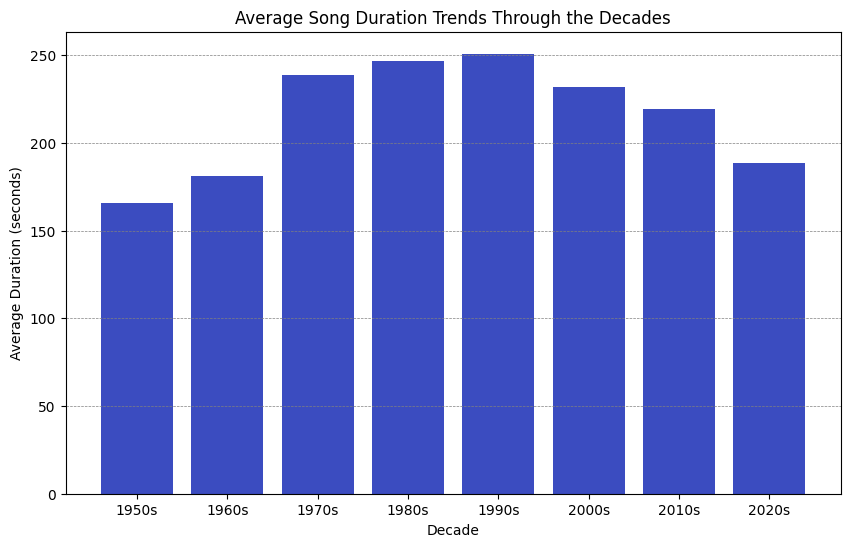

In [32]:
# Calculate the average duration of tracks per decade in milliseconds
avg_duration_per_decade = df_tracks.groupby('Decade')['duration_ms'].mean()

# Convert the average duration from milliseconds to seconds for better readability
avg_duration_per_decade_seconds = avg_duration_per_decade / 1000

# Create a bar plot to visualize the average duration of tracks per decade
plt.figure(figsize=(10, 6))  # Set the size of the plot
colors = plt.cm.coolwarm(np.linspace(0, 1, 1))  # Define a color palette for the bars

# Plot the bar chart
plt.bar(avg_duration_per_decade_seconds.index, avg_duration_per_decade_seconds.values, color=colors)
plt.title("Average Song Duration Trends Through the Decades")  # Set the title of the plot
plt.xlabel("Decade")  # Label for the x-axis
plt.ylabel("Average Duration (seconds)")  # Label for the y-axis
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')  # Add grid lines for better readability

plt.show()  # Display the plot


**Observations:**
- There was a rising trend in the duration of popular songs from the 1950s through the 1990s, followed by a decline in the 2000s and 2010s.
- The 2020s show the lowest measure, indicating a notable reduction in the duration of iconic songs in recent years.

### Songs Duration by Genre

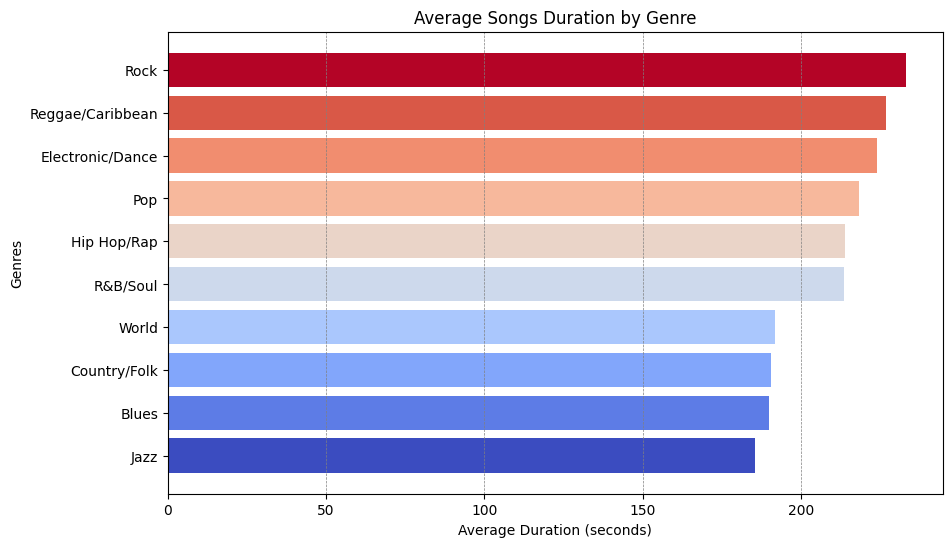

In [33]:
avg_duration_per_genre = df_tracks.groupby('Genres_Macro')['duration_ms'].mean().sort_values()
avg_duration_per_genre_seconds = avg_duration_per_genre/1000
plt.figure(figsize= (10,6))
colors = plt.cm.coolwarm(np.linspace(0, 1, len(avg_duration_per_genre_seconds)))
plt.barh(avg_duration_per_genre_seconds.index, avg_duration_per_genre_seconds.values, color = colors)
plt.title('Average Songs Duration by Genre')
plt.xlabel('Average Duration (seconds)')
plt.ylabel('Genres')
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='gray')

plt.show()

**Observations:**

- **Rock** features the longest average track durations, standing out as the genre with the most extended songs.
- **Reggae/Caribbean** and **Electronic/Dance** also have relatively long track durations, following closely behind Rock.
- **Pop** and **R&B/Soul** show moderate track lengths, indicating a balance between shorter and longer songs.
- **Hip Hop/Rap** and **Blues** have slightly shorter average durations compared to Pop and R&B/Soul.
- **Jazz**, **Country/Folk**, and **World** tend to have the shortest track durations among the genres analyzed.

This pattern suggests that Rock and Reggae/Caribbean genres generally have longer songs, while Jazz and World feature shorter tracks.



## Keys and Modes Insights

**Key** indicates the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**Mode** indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

First of all, we will check how many keys have not being detected (-1 values).

In [34]:
# Find the number of tracks with key -1 (no key detected)
count_no_key = df_tracks[df_tracks['key'] == -1]['key'].count()

print(f"Number of tracks with no key detected: {count_no_key}")


Number of tracks with no key detected: 0


### Data Preparation for Musical Key and Mode Analysis

#### Add Tonal Key Names for Enhanced Analysis

Converting pitch classes to tonal names improves the clarity and usability of musical key data. Tonal names such as C, D, and E♭ are more recognizable and meaningful compared to numerical pitch classes. This conversion aids in easier analysis and interpretation of musical patterns and trends associated with specific keys, enhancing the overall readability and insight of the dataset.


In [35]:
# Define the mapping of pitch classes to tonal counterparts
key_mapping = {
    '0': 'C',
    '1': 'C♯/D♭',
    '2': 'D',
    '3': 'D♯/E♭',
    '4': 'E',
    '5': 'F',
    '6': 'F♯/G♭',
    '7': 'G',
    '8': 'G♯/A♭',
    '9': 'A',
    '10': 'A♯/B♭',
    '11': 'B'
}

# Apply the mapping to create a new column for tonal keys
df_tracks['Tonal_Key'] = df_tracks['key'].map(key_mapping)


#### Add Mode Names for Enhanced Analysis

Converting numerical mode values to descriptive names enhances the understanding of musical modes in the dataset. The `mode` column, which uses numerical codes, is mapped to either 'Major' or 'Minor' based on its value. This transformation makes the data more intuitive and accessible, facilitating easier exploration and interpretation of musical modes and their patterns within the tracks.


In [36]:
# Create a new 'Mode_Name' column based on 'mode' values
df_tracks['Mode_Name'] = df_tracks['mode'].apply(lambda x: 'Major' if x == 1 else 'Minor')

#### Combining Tonal Keys and Modes into a Unified Format

To enhance the clarity of our musical key data, we will create a new column called `Key_Mode`, which combines the `Tonal_Key` and `Mode_Name` into a single descriptive field. This approach provides a comprehensive view of each track’s musical key, integrating both the pitch class and the mode (Major or Minor).

**Process:**

1. **Initialize the `Key_Mode` Column**:
   - We start by adding a new column named `Key_Mode` to the DataFrame to store the combined information.

2. **Iterate Over the DataFrame**:
   - For each track, retrieve the `Tonal_Key` and `Mode_Name`.

3. **Handle Alternative Key Names**:
   - If the `Tonal_Key` contains an alternative name (e.g., G♯/A♭), choose the appropriate name based on the mode:
     - Use the first name for Major modes.
     - Use the second name for Minor modes.

4. **Combine and Assign Values**:
   - If there is no alternative name, concatenate the `Tonal_Key` with the `Mode_Name` directly (e.g., 'C Major' or 'D Minor').
   - Assign this combined value to the `Key_Mode` column for each track.

This transformation will make it easier to analyze and interpret musical keys in a unified format, facilitating better understanding and comparison across tracks.

Below is the code to achieve this:


In [37]:
# Create a new column 'Key_Mode' to combine tonal keys and modes
df_tracks['Key_Mode'] = ''

# Iterate over the DataFrame to populate the 'Key_Mode' column
for index, row in df_tracks.iterrows():
    key = row['Tonal_Key']  # Retrieve the tonal key from the row
    mode = row['Mode_Name']  # Retrieve the mode from the row

    if '/' in key:
        # If the key contains an alternative name (e.g., G♯/A♭), determine which name to use based on the mode
        if mode == 'Major':
            key_mode = key.split('/')[0] + ' Major'  # Use the first name in the alternative pair with 'Major'
        else:
            key_mode = key.split('/')[1] + ' Minor'  # Use the second name in the alternative pair with 'Minor'
    else:
        # If the key does not have an alternative name, combine the key with the mode directly
        key_mode = key + ' ' + mode

    df_tracks.at[index, 'Key_Mode'] = key_mode  # Assign the combined key and mode to the 'Key_Mode' column


#### Aggregation of Unique Tonal Keys and Modes by `Key_Mode`

Group the DataFrame by `Key_Mode` and aggregate unique values of `Tonal_Key` and `Mode_Name`. This will show the distinct tonal keys and modes associated with each `Key_Mode`. The result will help us understand the variety and distribution of musical keys within the dataset.

In [38]:
# Group the DataFrame by 'Key_Mode' and aggregate the unique values of 'Tonal_Key' and 'Mode_Name'
key_mode_analysis = df_tracks.groupby('Key_Mode').agg({'Tonal_Key': 'unique', 'Mode_Name': 'unique'}).reset_index()

key_mode_analysis

,Key_Mode,Tonal_Key,Mode_Name
0,A Major,[A],[Major]
1,A Minor,[A],[Minor]
2,A♭ Minor,[G♯/A♭],[Minor]
3,A♯ Major,[A♯/B♭],[Major]
4,B Major,[B],[Major]
5,B Minor,[B],[Minor]
6,B♭ Minor,[A♯/B♭],[Minor]
7,C Major,[C],[Major]
8,C Minor,[C],[Minor]
9,C♯ Major,[C♯/D♭],[Major]


### Distribution of Musical Modes

This analysis visualizes the distribution of musical modes within the dataset. The pie chart shows the percentage of Major and Minor modes, providing insight into their relative frequency in the collection of tracks.


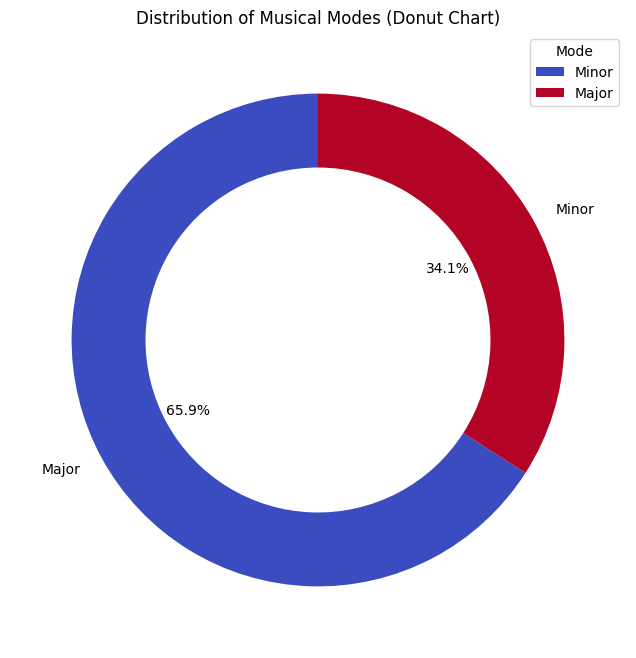

In [39]:
# Count the occurrences of each mode in the 'Mode_Name' column
mode_counts = df_tracks['Mode_Name'].value_counts()

# Calculate the total number of tracks in the dataset
total_tracks = len(df_tracks)

# Compute the percentage of each mode relative to the total number of tracks
mode_percentages = (mode_counts / total_tracks) * 100

# Create a donut chart to visualize the distribution of modes
colors = plt.cm.coolwarm(np.linspace(0, 1, len(mode_counts)))  # Generate a color map for the chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(mode_percentages,
        labels=mode_percentages.index,
        autopct='%1.1f%%',  # Display percentages on the chart
        startangle=90,  # Start the pie chart at 90 degrees
        colors=colors,  # Apply the color map
        wedgeprops=dict(width=0.3))  # Set the width of the wedges to create a donut chart

plt.legend(title='Mode', labels=['Minor', 'Major'])


# Set the title and display the donut chart
plt.title('Distribution of Musical Modes (Donut Chart)')
plt.show()

**Observations**

- **Major** modes are the most prevalent, comprising approximately 63.2% of the dataset.

- **Minor** modes account for about 36.8%, indicating a smaller but significant presence compared to Major modes.



### Musical Mode Trends Through the Decades

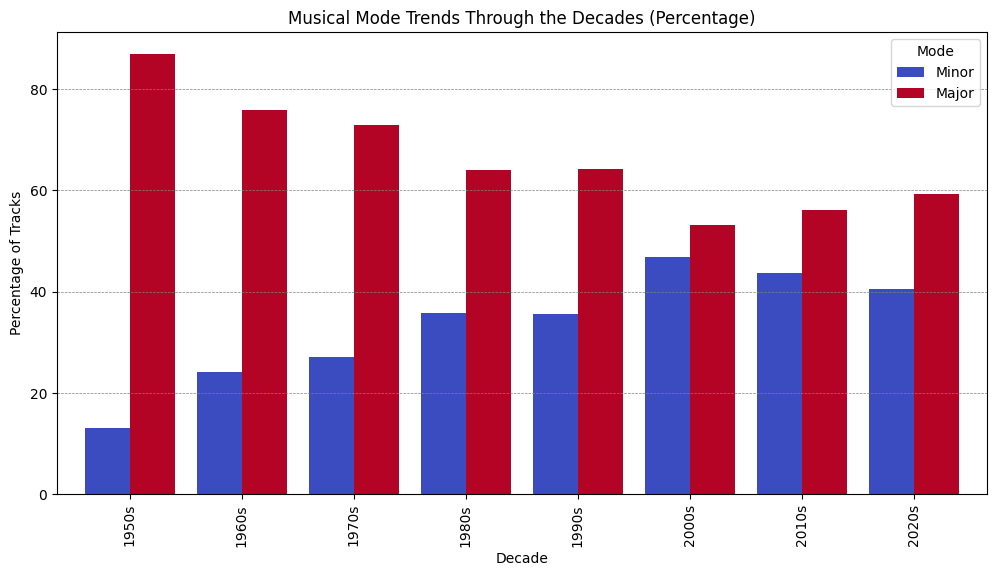

In [40]:
# Calculate the mode distribution per decade as percentages
# Group the tracks by 'Decade' and 'mode', then count the occurrences of each mode within each decade
mode_distribution_per_decade_pct = df_tracks.groupby(['Decade', 'mode'])['Track_ID'].count().unstack()

# Normalize the counts to get percentages for each decade
# Divide each count by the total count of tracks in that decade to get the percentage representation
mode_distribution_per_decade_pct = mode_distribution_per_decade_pct.div(mode_distribution_per_decade_pct.sum(axis=1), axis=0) * 100

# Create a bar plot to visualize the percentage distribution of modes per decade
# Define colors for the bars, one color for each mode
colors = plt.cm.coolwarm(np.linspace(0, 1, 2))

# Plot the percentage distribution as a bar chart with the specified figure size and colors
mode_distribution_per_decade_pct.plot(kind='bar', figsize=(12, 6), color=colors, width=0.8)

# Set labels and title for the plot
plt.xlabel('Decade')
plt.ylabel('Percentage of Tracks')
plt.title('Musical Mode Trends Through the Decades (Percentage)')

# Add a legend to distinguish between 'Minor' and 'Major' modes
plt.legend(title='Mode', labels=['Minor', 'Major'])

# Add grid lines to the y-axis for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Display the plot
plt.show()


**Observations**

- **Major** modes have seen a gradual decrease in prevalence over the decades
- **Minor** modes have become more prominent, indicating a shift towards a more balanced distribution of musical modes over time.


### Distribution of Tracks by Key Mode

This section of code calculates and visualizes the distribution of songs across different key modes in the dataset. We first group the data by `Key_Mode` and compute the percentage of songs in each mode relative to the total number of tracks. The resulting horizontal bar chart provides a clear visual representation of the most and least common key modes, helping to identify trends in musical compositions based on key.


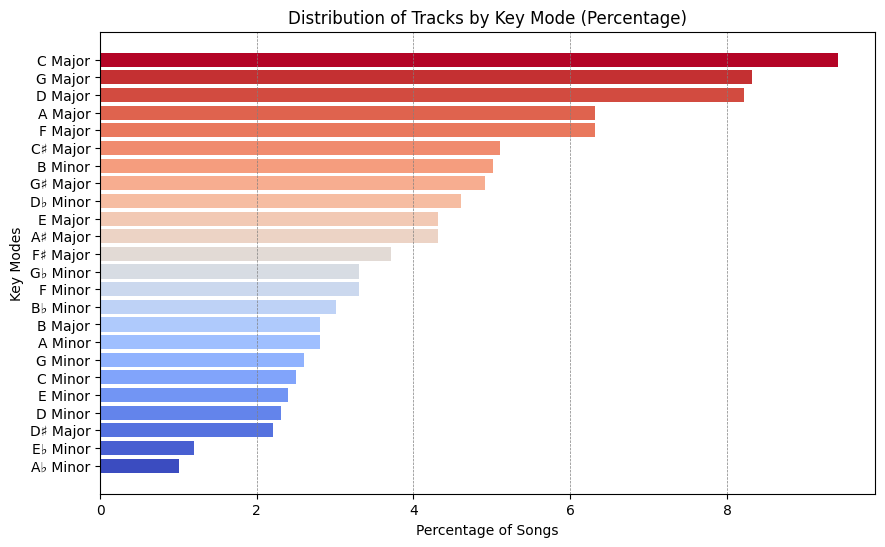

In [41]:
# Calculate the count of tracks for each key mode and sort them in ascending order
count_key_mode_tracks = df_tracks.groupby('Key_Mode')['Track_ID'].count().sort_values(ascending=True)

# Calculate the total number of tracks
total_tracks = count_key_mode_tracks.sum()

# Compute the percentage of tracks for each key mode relative to the total
percentage_key_mode_tracks = (count_key_mode_tracks / total_tracks) * 100

# Create a horizontal bar plot to visualize the percentage of tracks per key mode
plt.figure(figsize=(10, 6))  # Set the figure size
colors = plt.cm.coolwarm(np.linspace(0, 1, len(percentage_key_mode_tracks)))  # Define a color map for the bars
plt.barh(percentage_key_mode_tracks.index, percentage_key_mode_tracks.values, color=colors)  # Plot horizontal bars
plt.title('Distribution of Tracks by Key Mode (Percentage)')  # Set the title of the plot
plt.ylabel('Key Modes')  # Label the y-axis
plt.xlabel('Percentage of Songs')  # Label the x-axis
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='gray')  # Add gridlines to the x-axis

plt.show()  # Display the plot


**Observations**

- **C Major** and **G Major** are the most common key modes, with C Major having the highest percentage.
- **D Major** and **A Major** also show strong representation, while minor keys are less prevalent compared to major keys.


## Valence Insights - What makes a song Happy or Sad?

**Valence** is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

A common perception is the association of major keys with happiness and minor keys with sadness, but it's not an absolute rule.

* **Major Keys**: Often perceived as bright, uplifting, and happy. This association comes from the harmonic and emotional qualities that major scales often evoke in Western music.

* **Minor Keys**: Typically associated with darker, more melancholic, or introspective emotions. Minor scales tend to produce a more somber or reflective mood.

However, the emotional impact of music can be influenced by many factors beyond just the key, such as **tempo**, **rhythm**, **lyrics**, and **personal experiences**.

Different cultures and genres may interpret these associations differently, and individual responses to music can vary widely.

### Distribution of Valence by Musical Mode (Major/Minor)
In this section, we will calculate and visualize the average valence for each musical mode (Major and Minor). Valence measures the musical mood, with higher values indicating a more positive or uplifting tone. By plotting the average valence for Major and Minor modes, we can compare their emotional characteristics and observe any notable differences.






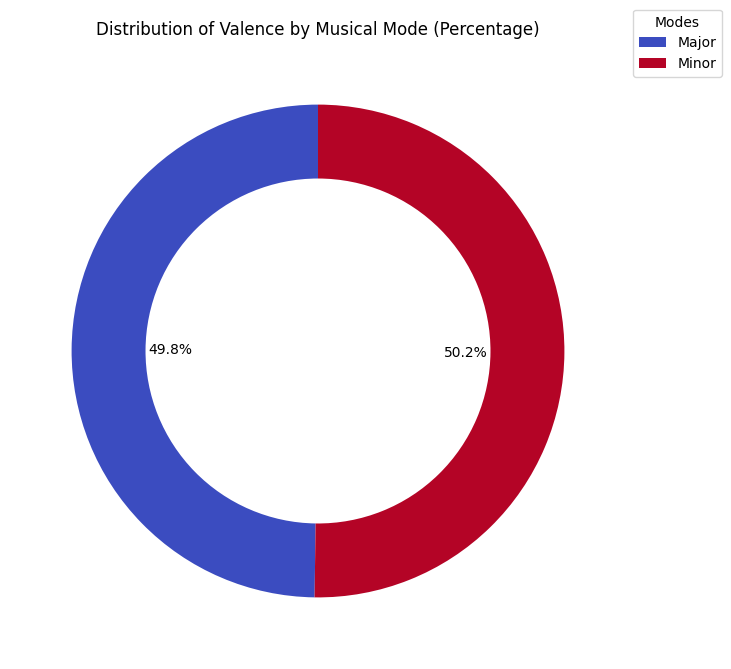

In [42]:
# Calculate the average valence for each musical mode (Major and Minor)
avg_valence_per_mode = df_tracks.groupby('Mode_Name')['valence'].mean()

# Create a donut chart to visualize the distribution of average valence by mode
plt.figure(figsize=(8, 8))  # Set the size of the figure
colors = plt.cm.coolwarm(np.linspace(0, 1, len(avg_valence_per_mode)))  # Generate a color map for the chart

# Plot the donut chart
wedges, texts, autotexts = plt.pie(
    avg_valence_per_mode.values,

    autopct='%1.1f%%',  # Display the percentage for each segment
    startangle=90,  # Rotate the start angle of the chart
    colors=colors,  # Apply the color map
    wedgeprops=dict(width=0.3)  # Create a donut chart by setting the width of the wedges
)

# Add a legend to the plot
plt.legend(wedges, avg_valence_per_mode.index, title="Modes", loc="center left", bbox_to_anchor=(1, 1, 0, 0))

# Set the title for the donut chart
plt.title('Distribution of Valence by Musical Mode (Percentage)')

# Display the donut chart
plt.show()


**Observations**

- **Average Valence**: The average valence of Major and Minor mode tracks appears to be similar, suggesting that there may not be a strong correlation between the mode and the musical positiveness conveyed by the tracks.

- **Further Analysis**: To definitively confirm the absence of a correlation, additional statistical tests or visualizations would be necessary to assess if the observed differences in valence between Major and Minor modes are statistically significant.




### Valence by Key and Mode



This section calculates the average valence (positivity) for each musical key mode and visualizes it in a horizontal bar chart. It highlights how different key modes are associated with varying emotional tones in the dataset.


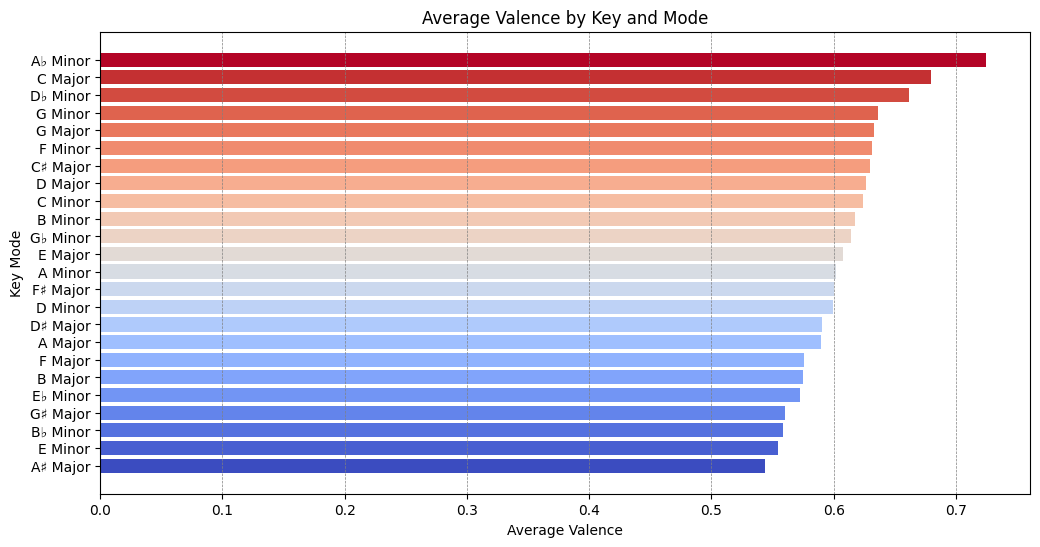

In [43]:
# Calculate the average valence for each musical Key Mode
avg_valence_by_key_mode = df_tracks.groupby('Key_Mode')['valence'].mean().sort_values()

# Create a horizontal bar plot to visualize average valence by Key Mode
plt.figure(figsize=(12, 6))  # Set the size of the figure
colors = plt.cm.coolwarm(np.linspace(0, 1, len(avg_valence_by_key_mode)))  # Define a color map for the bars

# Plot the horizontal bar chart
plt.barh(
    avg_valence_by_key_mode.index,  # Key Modes as y-axis labels
    avg_valence_by_key_mode.values,  # Average valence values as bar lengths
    color=colors  # Apply color map
)

# Label the x-axis with 'Average Valence' and the y-axis with 'Key Mode'
plt.xlabel('Average Valence')
plt.ylabel('Key Mode')

# Set the title for the bar plot
plt.title('Average Valence by Key and Mode')

# Add gridlines to the x-axis for better readability
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='gray')

# Display the plot
plt.show()



**Observations**

- **Higher Valence**: The key modes with the highest average valence are A♭ Minor, C Major, and D♭ Minor, indicating these keys tend to have more positive and uplifting characteristics according to the valence measure.

- **Variation by Key**: Major keys generally show a higher average valence compared to Minor keys, with notable exceptions such as G Minor and C Minor, which also have relatively high valence values.


## Valence Trends Through the Decades

The next code will calculate and visualizes the average valence (musical positivity) for each decade, allowing us to observe trends in the emotional tone of songs over time.


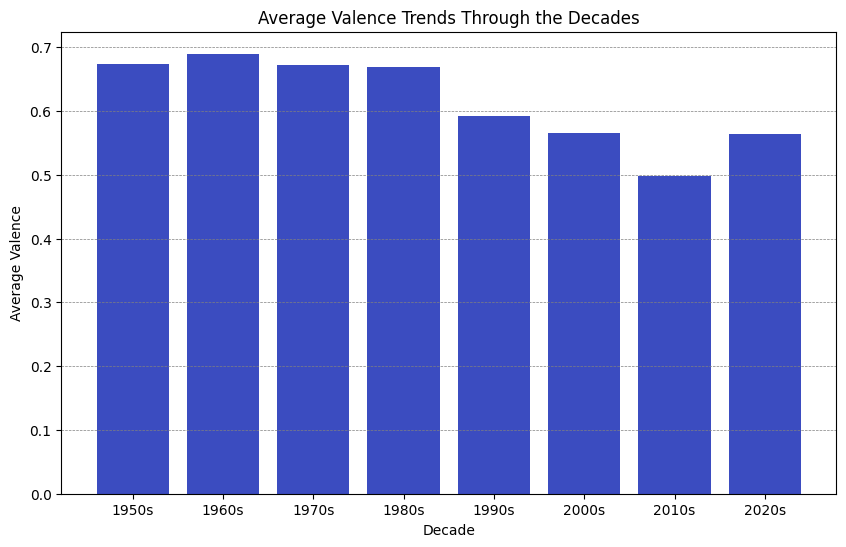

In [44]:
# Calculate the average valence per decade
avg_valence_per_decade = df_tracks.groupby('Decade')['valence'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.coolwarm(np.linspace(0, 1, 1))
plt.bar(avg_valence_per_decade.index, avg_valence_per_decade.values, color=colors)
plt.xlabel('Decade')
plt.ylabel('Average Valence')
plt.title('Average Valence Trends Through the Decades')
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

plt.show()


**Observations**

- **1950s-1960s**: The average valence was relatively high, indicating more positive and cheerful tracks during these decades.
- **1970s-2020s**: There has been a steady decline in average valence over time, particularly from the 1990s onwards, suggesting a shift towards more emotionally neutral or negative music in recent decades.


### Correlation Between Valence and Tempo
The next scatter plot illustrates how valence (musical positivity) correlates with tempo (BPM) across the dataset. This chart provides insight into whether faster or slower tempos are associated with higher or lower valence values.


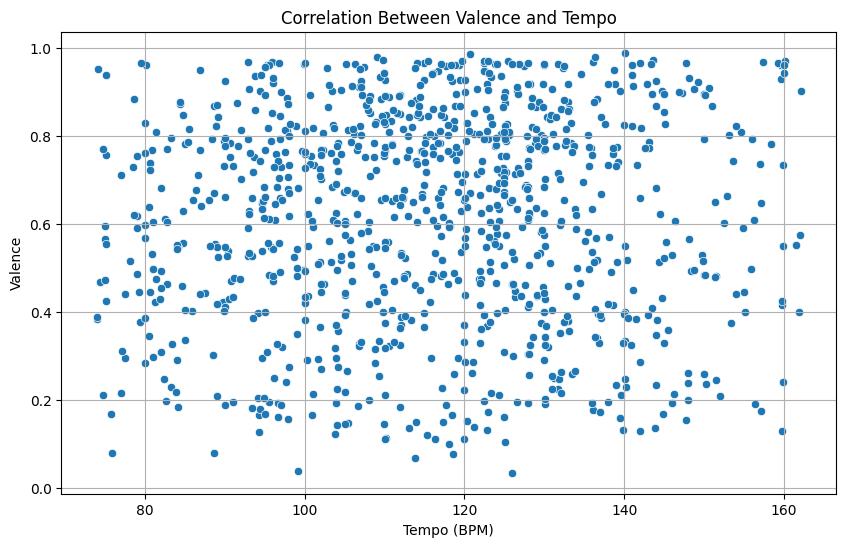

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='valence', data=df_tracks)
plt.xlabel('Tempo (BPM)')
plt.ylabel('Valence')
plt.title('Correlation Between Valence and Tempo')
plt.grid(True)
plt.show()


**Observations**
* The scatter plot of valence vs tempo reveals no clear linear relationship between the two variables. this indicates that a song's tempo does not consistently correlate with its perceived emotional positivity (valence), suggesting that other factors contribute to the overall "feel" of a track.

## Explicit Insights

The **Explicit** feature indicates whether a track contains explicit lyrics (true = explicit, false = not explicit, or unknown). Since a value of false might also signify that the explicitness of the track is unknown, the analysis of this feature may not be fully reliable.

### Explicit Trends Through the Decades

<Figure size 1000x600 with 0 Axes>

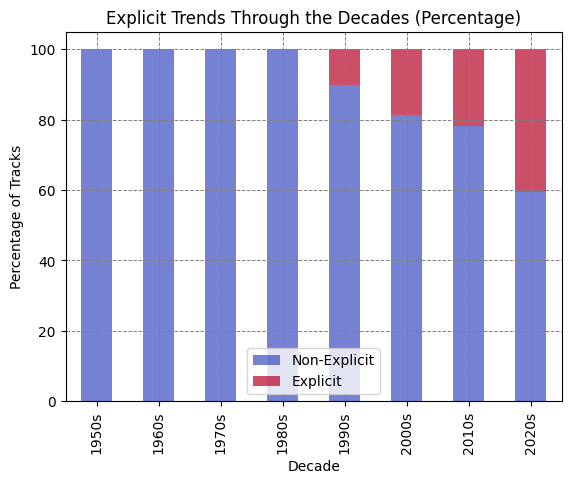

In [46]:
# Calculate the count of explicit and non-explicit tracks for each decade
# Group the data by 'Decade' and 'Explicit' status, then count the number of 'Track_ID' entries
explicit_counts = df_tracks.groupby(['Decade', 'Explicit'])['Track_ID'].count()

# Calculate the percentage of explicit tracks within each decade
# Divide the count of explicit tracks by the total number of tracks per decade,
# multiply by 100 to get the percentage, and reshape the data for plotting
explicit_percentages = (explicit_counts.div(total_tracks_per_decade, level='Decade') * 100).unstack()

# Plot the percentages of explicit and non-explicit tracks
# Define a color scheme using a gradient from the 'coolwarm' colormap
colors = plt.cm.coolwarm(np.linspace(0, 1, 2))

# Create a figure with a specified size for the plot
plt.figure(figsize=(10, 6))

# Plot the data as a stacked area chart with transparency for better visibility
ax = explicit_percentages.plot(kind='bar', stacked= True, color=colors, alpha=0.7)

# Set labels for the x-axis and y-axis
plt.xlabel('Decade')
plt.ylabel('Percentage of Tracks')

# Add a title to the plot
plt.title('Explicit Trends Through the Decades (Percentage)')

# Add a legend to distinguish between explicit and non-explicit tracks
plt.legend(labels=['Non-Explicit', 'Explicit'])

# Add grid lines to the plot for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray')

# Display the plot
plt.show()



**Observations**

- **1950s-1980s**: Data for these decades is either missing or marked as `False`, which may also suggest that the explicitness is unknown. Thus, the analysis for these earlier periods might not be fully reliable.

- **1990s**: The explicit content was relatively low, with a noticeable proportion of songs marked as explicit compared to previous decades.

- **2000s**: There was an increase in explicit content compared to the 1990s, indicating a trend toward more explicit lyrics in this decade.

- **2010s**: The proportion of explicit songs continued to rise, reflecting a growing trend in explicit content.

- **2020s**: Explicit content surged significantly, showing a marked increase compared to previous decades.

Overall, there is a clear upward trend in explicit content in recent decades, while earlier data may be less reliable due to potential unknown values.


# Discovering correlationts among features
We will now explore interesting correlations among the features using a correlation matrix. Before doing so, it's important to scale the data and encode any non-numeric values.

## Data transformation
Data transformation will involve scaling (through standardization and/or normalization) and encoding.


## Scaling

To determine whether to apply standardization or normalization to a feature, it’s crucial to examine its distribution.

* **Standardization** transforms data to have a mean of 0 and a variance of 1. It is particularly useful for data that follows a Gaussian distribution or when you want to maintain the original distribution's shape and handle outliers effectively.


* **Normalization** scales numerical variables to a specific range, typically [0, 1] or [-1, 1]. It is useful for data with varying ranges or when you need to bring all features into a common scale. It can be less effective if data contains outliers.


In [47]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

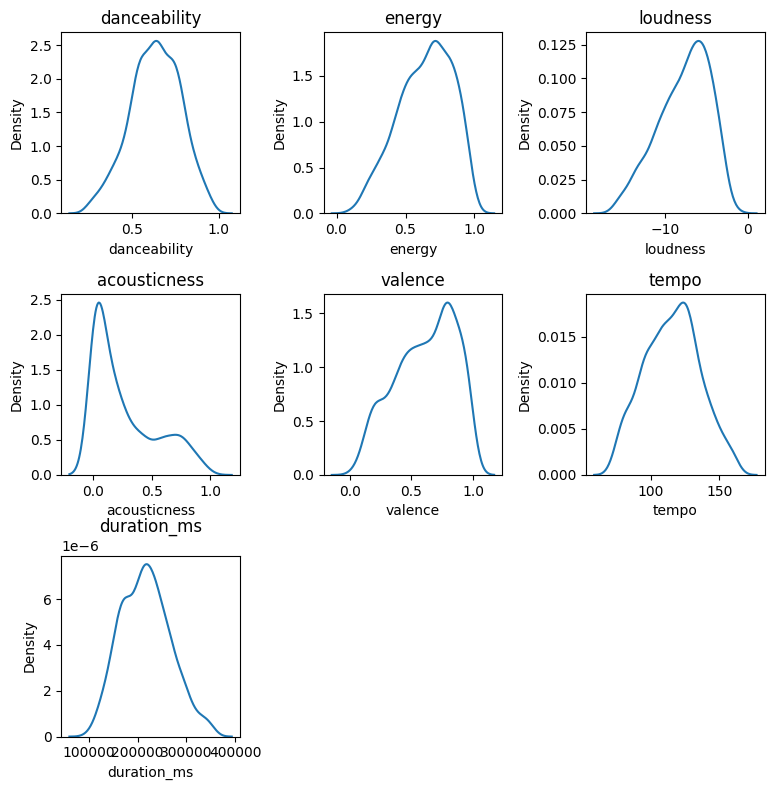

In [48]:
numerical_features = ['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'tempo', 'duration_ms' ]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

sns. kdeplot(data=df_tracks, x= 'danceability', ax=axes [0, 0])
axes [0, 0]. set_title( 'danceability')

sns. kdeplot(data=df_tracks, x= 'energy', ax=axes [0, 1])
axes [0, 1]. set_title('energy')

sns. kdeplot(data=df_tracks, x= 'loudness', ax=axes [0, 2])
axes [0, 2]. set_title('loudness')

sns. kdeplot(data=df_tracks, x= 'acousticness', ax=axes [1, 0])
axes [1, 0]. set_title('acousticness')

sns. kdeplot(data=df_tracks, x= 'valence', ax=axes [1, 1])
axes [1, 1]. set_title('valence')

sns. kdeplot(data=df_tracks, x= 'tempo', ax=axes [1, 2])
axes [1, 2]. set_title('tempo')

sns. kdeplot(data=df_tracks, x= 'duration_ms', ax=axes [2, 0])
axes [2, 0]. set_title('duration_ms')

plt.tight_layout()
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
plt. show()

### Standardizzazione

In order to preserve the distribution of the data, we will apply standardization.

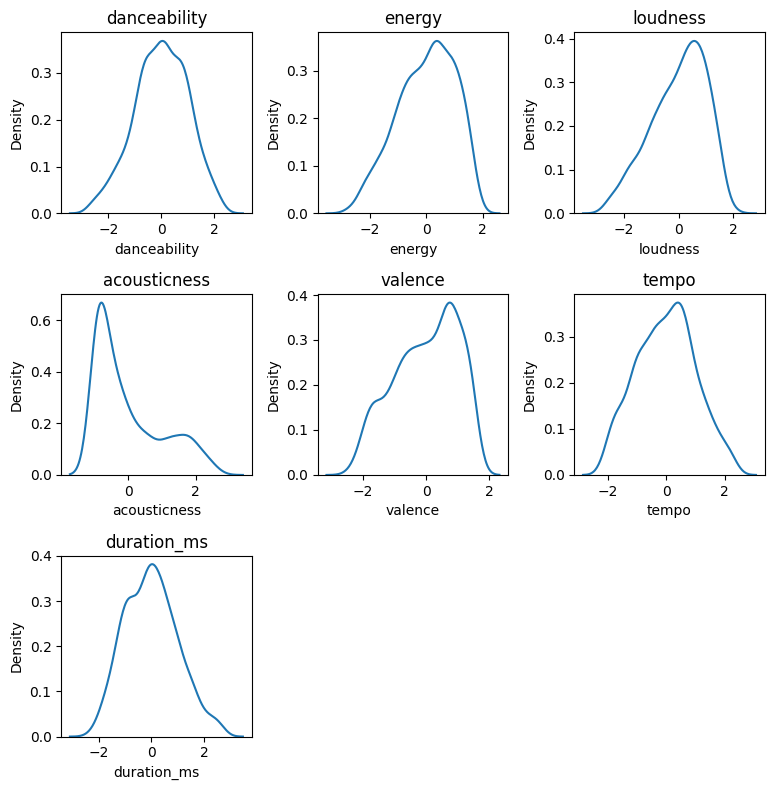

In [49]:
# Select numerical features for standardization
numerical_features = ['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'tempo', 'duration_ms']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
df_tracks[numerical_features] = scaler.fit_transform(df_tracks[numerical_features])

# Plot the distribution of standardized features
numerical_features = ['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'tempo', 'duration_ms' ]


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

sns. kdeplot(data=df_tracks, x= 'danceability', ax=axes [0, 0])
axes [0, 0]. set_title( 'danceability')

sns. kdeplot(data=df_tracks, x= 'energy', ax=axes [0, 1])
axes [0, 1]. set_title('energy')

sns. kdeplot(data=df_tracks, x= 'loudness', ax=axes [0, 2])
axes [0, 2]. set_title('loudness')

sns. kdeplot(data=df_tracks, x= 'acousticness', ax=axes [1, 0])
axes [1, 0]. set_title('acousticness')

sns. kdeplot(data=df_tracks, x= 'valence', ax=axes [1, 1])
axes [1, 1]. set_title('valence')

sns. kdeplot(data=df_tracks, x= 'tempo', ax=axes [1, 2])
axes [1, 2]. set_title('tempo')

sns. kdeplot(data=df_tracks, x= 'duration_ms', ax=axes [2, 0])
axes [2, 0]. set_title('duration_ms')

plt.tight_layout()
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
plt. show()

## Encoding
Enconding converts categorical variables into numerical values.


### Categorizing Categorical Features

This section of the code processes the list of categorical features in our dataset to classify them into binary and non-binary categories:

- **Binary Features**: Features with exactly two unique values.
- **Non-Binary Features**: Features with more than two unique values.

This classification helps in deciding appropriate encoding strategies for different types of categorical data.


In [50]:
# List of categorical features in the dataset
categorical_features = [
  'Decade',
  'Explicit',
  'key',
  'mode',
  'time_signature',
  'Genres_Macro',
  'Key_Mode'
]

# Lists to store binary and non-binary categorical features
binary_list = []
non_binary_list = []

print('-------------------')

# Iterate through each categorical feature
for x in categorical_features:
  # Print the current feature name
  print(x)

  # Calculate the number of unique values in the current feature
  num_cat = len(df_tracks[x].unique())

  # Print the number of unique values
  print(num_cat)

  # Check if the number of unique values is 2 (binary feature)
  if num_cat == 2:
    # Add the feature to the binary list if it has exactly 2 unique values
    binary_list.append(x)
    print('-------------------')
  else:
    # Add the feature to the non-binary list if it has more than 2 unique values
    non_binary_list.append(x)
    print('-------------------')


-------------------
Decade
8
-------------------
Explicit
2
-------------------
key
12
-------------------
mode
2
-------------------
time_signature
4
-------------------
Genres_Macro
10
-------------------
Key_Mode
24
-------------------


### Label Encoding for Binary Features
A Label Encoder convert categorical labels into numerical values. It assigns a unique integer to each category in a dataset, enabling algorithms that require numerical input to process categorical data effectively.

In [51]:
print(f'The Binary Features are {", ".join(binary_list)}')

The Binary Features are Explicit, mode


In [52]:
from sklearn.preprocessing import LabelEncoder
enco = LabelEncoder()
for x in binary_list:

  df_tracks[x] = enco.fit_transform(df_tracks[x])

In [53]:
df_tracks[binary_list].head()

,Explicit,mode
2,0,1
3,0,1
6,0,1
7,0,0
8,0,1


### Label Encoding for non-Binary Features
For non-Binary Features we will use the
Frequency Encoding.
Frequency Encoding assigns numerical values to categorical variables based on the frequency of each category's occurrence in the dataset. For each category, its frequency (or count) is used as its numeric value. This approach helps to incorporate information about the prevalence of each category into the model.


In [54]:
print(f'Non-Binary Features are {", ".join(non_binary_list)}')

Non-Binary Features are Decade, key, time_signature, Genres_Macro, Key_Mode


In [55]:
# Iterate through each feature in the non-binary list
for x in non_binary_list:
  # Calculate the relative frequency (proportion) of each category in the current feature
  category_frequencies = df_tracks[x].value_counts(normalize=True)

  # Map each category in the feature to its corresponding frequency value
  # This replaces the categorical values with their proportions
  df_tracks[x] = df_tracks[x].map(category_frequencies)

We will check the Dtype of the features using `.info()`

In [56]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 2 to 1199
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Decade          998 non-null    float64
 1   Track_ID        998 non-null    object 
 2   Artist_name     998 non-null    object 
 3   Track_name      998 non-null    object 
 4   Explicit        998 non-null    int64  
 5   Release_year    998 non-null    object 
 6   Genres          998 non-null    object 
 7   danceability    998 non-null    float64
 8   energy          998 non-null    float64
 9   key             998 non-null    float64
 10  loudness        998 non-null    float64
 11  mode            998 non-null    int64  
 12  acousticness    998 non-null    float64
 13  valence         998 non-null    float64
 14  tempo           998 non-null    float64
 15  type            998 non-null    object 
 16  id              998 non-null    object 
 17  uri             998 non-null    object 

We will convert now all the numeric features in `float64`

In [57]:
# Select columns with integer data type
int_columns = df_tracks.select_dtypes(include=['int']).columns

# Convert integer columns to float64
df_tracks[int_columns] = df_tracks[int_columns].astype('float64')


## Calculating the Correlation Matrix

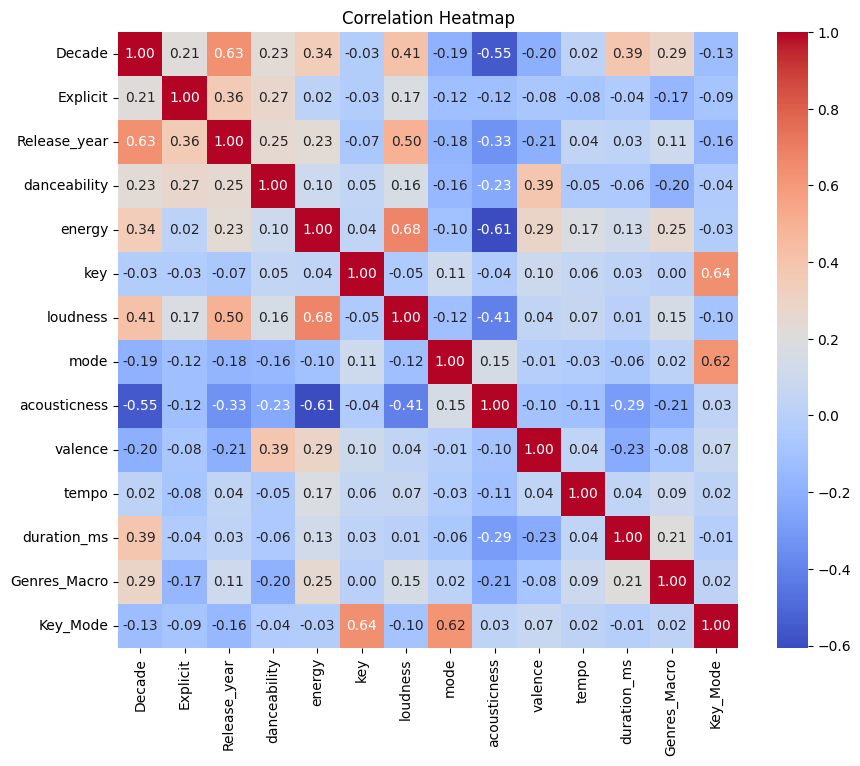

In [58]:
# List of features to include in the correlation matrix
features_correlation = [
    'Decade',
    'Explicit',
    'Release_year',
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'acousticness',
    'valence',
    'tempo',
    'duration_ms',
    'Genres_Macro',
    'Key_Mode'
]

# Calculate the correlation matrix for the specified features
# The .corr() method computes pairwise correlation of columns
correlation_matrix = df_tracks[features_correlation].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size for the heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f")
# annot=True displays the correlation coefficients on the heatmap
# fmt=".2f" formats the correlation values to two decimal places

# Add a title to the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()



**Observations**


First of all, it is important to excluded from the analysis some correlations between some feature due to their inherent relationships:
* **Key Mode** and **Key**: since key_mode is derived from key, their correlation is redundant.
* **Key Mode** and **Mode**: similarly, key_mode is also derived from mode, making their correlation less informative.
* **Release Year** and **Decade**: these features are closely related, as decade is essentially a broader representation of the release year, so their correlation might not provide additional insights.

Excluding these correlations allows us to focus on the more meaningful relationships between the remaining features:

- **Energy and Loudness**
  - There is a strong positive correlation (0.68) between energy and loudness, indicating that louder songs tend to have higher energy. This is consistent with the idea that songs with higher volume levels are often perceived as more energetic or intense, likely due to production techniques that amplify both loudness and perceived intensity in modern music.

- **Energy and Acousticness**
  - A moderate negative correlation (-0.61) between energy and acousticness indicates that more energetic songs are generally less acoustic. This aligns with the idea that high-energy songs often rely more on electronic or amplified instruments rather than acoustic ones.

- **Decade and Acousticness**
  - There is a moderate negative correlation (-0.55) between the decade and acousticness. This indicates that songs from more recent decades tend to be less acoustic, suggesting a shift towards more electronic and production-heavy elements in recent years.

- **Released Year and Loudness**
  - A moderate positive correlation (0.50) between the released year and loudness suggests that songs released in more recent years tend to be louder. This might be attributed to evolving music production and mastering practices.

- **Valence and Danceability**
  - There is a moderate positive correlation (0.39) between valence and danceability. This means that songs that are more positive or happier (higher valence) tend to be more danceable. This aligns with the idea that upbeat and positive songs are often more suited for dancing.

- **Released Year and Explicit**
  - A moderate positive correlation (0.36) between the released year and explicit content indicates that more recent songs are somewhat more likely to feature explicit lyrics. This could reflect a trend towards more open and explicit content in recent years.

- **Valence and Energy**
  - A weak to moderate positive correlation (0.29) between valence and energy indicates that more positive songs tend to have higher energy. Although the relationship is not very strong, it suggests that happier songs are often more energetic.




